# Modelagem de Risco de Crédito

O projeto da **Sprint 08** tem por objetivo prever a probabilidade (classificação) de inadimplência de um cliente através da modelagem de risco de crédito. Para isso, foram fornecidos alguns datasets da `HomeCredit` importados abaixo. Os datasets principais estão conectados da seguinte forma:

<p align="center">
    <img src="./data/Home Credit.png" alt="Modelo Lógico" width="550">
</p>

# Importações e Datasets

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
train_df = pd.read_csv('./data/application_train.csv')
test_df = pd.read_csv('./data/application_test.csv')

In [5]:
bureau_df = pd.read_csv('./data/bureau.csv')
bureau_bal_df = pd.read_csv('./data/bureau_balance.csv')

In [6]:
credit_df = pd.read_csv('./data/credit_card_balance.csv')
previous_df = pd.read_csv('./data/previous_application.csv')

In [ ]:
train_df.shape

(307511, 122)

In [104]:
test_df.shape

(48744, 33)

In [6]:
bureau_df.shape

(1716428, 17)

In [7]:
credit_df.shape

(3840312, 23)

In [36]:
previous_df.shape

(1670214, 37)

In [7]:
pd.set_option('display.max_columns', None)
train_df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
bureau_df.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


In [10]:
credit_df.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [37]:
previous_df.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


# Removendo Features

Para realizar a etapa de EDA (Análise Exploratória), inicialmente utilizei o **Pandas Profiling** para conhecer previamente cada um dos datasets. Através da análise inicial com o Pandas Profiling pude perceber que algumas features possuiam muitos valores nulos, dado isso defini um threshold de 40%, dessa forma, as variáveis que possuírem mais que a porcentagem determinada serão removidas do dataset em questão. Além disso, observando os datasets, também percebi que muitas variáveis não são fundamentais para o problema de modelagem de risco de crédito, desse modo, essas variáveis também foram removidas.


O primeiro dataset a ser analisado foi o principal, `application_train`, e desse dataset foram removidas as seguintes features:
 - Colunas que não são fundamentais para a modelagem:

    'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'.

 - Colunas com muitos valores nulos:

    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'.

O segundo dataset a ser analisado foi o `bureau`, dele serão dropadas:

 - 'CREDIT_CURRENCY', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'.
 A primeira por serem categorias que não são explicadas pelo dataset e a última por não ser fundamental para a modelagem. A segunda e terceira colunas se complementam, como a terceira possui muitos valores faltantes ambas serão dropadas.

 - Colunas com muitos valores nulos:

    'AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE' e 'AMT_CREDIT_SUM_LIMIT'.
    
O terceiro dataset a ser analisado foi o de `credit_card_balance`, sendo removidas as seguintes variáveis:

 - Colunas com informações específicas não explicadas pelo dataset:

    'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
    'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT'.

 - Colunas que tem seus valores redundantes, sendo explicadas por outras variáveis do dataset:

    'AMT_RECEIVABLE_PRINCIPAL' e'CNT_INSTALMENT_MATURE_CUM'

O quarto dataset a ser analisado foi o de `previous_application`, sendo removidas as seguintes variáveis:

 - Colunas com a mesma informação de outras colunas presentes nos datasets acima:

    'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
    'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY'.

 - Colunas com muitos valores faltantes:

    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY' e 'RATE_INTEREST_PRIVILEGED'.

 - Colunas com informações específicas que não são explicadas pelo dataset ou colunas não fundamentais:

    'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
    'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
    'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'.

In [107]:
# Dropando as colunas do application_train
drop_columns = [
    'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

drop_columns.extend([f'FLAG_DOCUMENT_{i}' for i in range(2, 22)])

train_df = train_df.drop(columns=drop_columns)

In [9]:
# Dropando colunas do bureau
bureau_df = bureau_df.drop(columns=['CREDIT_CURRENCY', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'])

In [10]:
# Dropando colunas do credit card
columns_to_drop = [
    'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
    'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'CNT_INSTALMENT_MATURE_CUM'
]

credit_df = credit_df.drop(columns=columns_to_drop)

In [11]:
# Dropando as colunas do previous application
colunas_para_remover = [
    'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
    'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY',
    'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
    'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
    'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'
]

previous_df = previous_df.drop(columns=colunas_para_remover)

# Engenharia de Atributos

Para diminuir a dimensionalidade de algumas variáveis categóricas, bem como deixar as informações de uma forma mais compreensível, estarei realizando uma engenharia de atributos em algumas features, sendo elas:

 - ORGANIZATION_TYPE (application_train)
 - CREDIT_TYPE (bureau)

### Manipulando Organization Type

In [108]:
def agrupar_organization_type(tipo):
    if 'Industry' in tipo:
        return 'Industry'
    elif 'Trade' in tipo:
        return 'Trade'
    elif 'Transport' in tipo:
        return 'Transport'
    elif 'Business Entity' in tipo:
        return 'Business'
    else:
        return tipo  
    
train_df['ORGANIZATION_TYPE_GROUPED'] = train_df['ORGANIZATION_TYPE'].apply(agrupar_organization_type)

### Manipulando Credit Type

In [13]:
def agrupar_outros_loans(tipo):
    categorias_raras = [
        'Another type of loan',
        'Unknown type of loan',
        'Loan for working capital replenishment',
        'Cash loan (non-earmarked)',
        'Real estate loan',
        'Loan for the purchase of equipment',
        'Loan for purchase of shares (margin lending)',
        'Loan for business development',
        'Interbank credit',
        'Mobile operator loan'
    ]
    
    if tipo in categorias_raras:
        return 'Other loans'
    else:
        return tipo  

bureau_df['CREDIT_TYPE'] = bureau_df['CREDIT_TYPE'].apply(agrupar_outros_loans)

# Análise Exploratória dos Dados

## Application Train

In [16]:
train_df.shape

(307511, 34)

Através do shape, percebemos que inicialmente existiam 122 features e com o processo de remoção acima apenas 33 colunas restaram. Dessa forma, foram removidas 89 colunas do dataset.

In [17]:
pd.set_option('display.max_columns', None)
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,ORGANIZATION_TYPE_GROUPED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,Laborers,1.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,Business
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,Core staff,2.0,1,MONDAY,0,School,1.0,0.0,1.0,0.0,0.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,Laborers,1.0,2,MONDAY,0,Government,0.0,0.0,0.0,0.0,0.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,Laborers,2.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,Business
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,Core staff,1.0,2,THURSDAY,0,Religion,0.0,0.0,0.0,0.0,0.0,Religion


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [19]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.998133,0.281066,2.152665,2.031521,0.015144,1.422245,0.143421,1.405292,0.100049,0.267395
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.043164,0.449521,0.910682,0.502737,0.122126,2.400989,0.446698,2.379803,0.362291,0.916002
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,20.000000,3.000000,1.000000,348.000000,34.000000,344.000000,24.000000,27.000000


### Visualizando Variáveis Categóricas

<Axes: xlabel='TARGET', ylabel='count'>

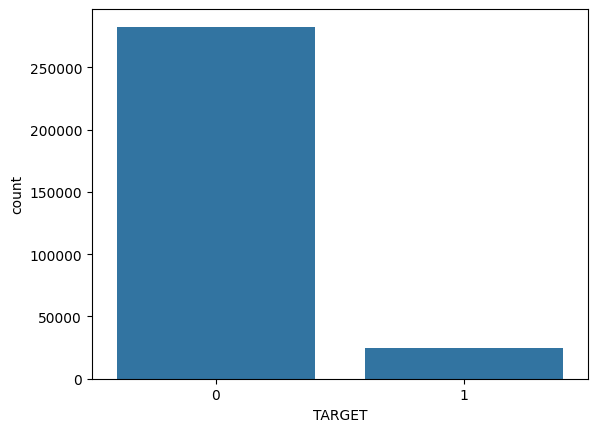

In [4]:
sns.countplot(x='TARGET', data=train_df)

O gráfico da variável `TARGET` indica um desbalanceamento considerável das classes da variável previsora, sendo a Classe 0 a majoritária e a Classe 1 a com menos ocorrência. Esse tipo de comportamento pode afetar as previsões mais a frente.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

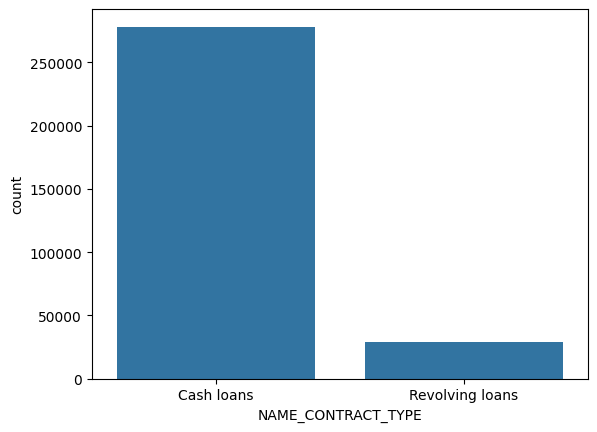

In [20]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=train_df)

<Axes: xlabel='CODE_GENDER', ylabel='count'>

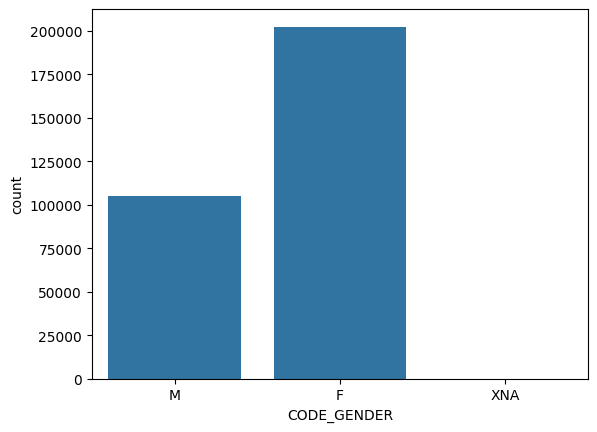

In [21]:
sns.countplot(x='CODE_GENDER', data=train_df)

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

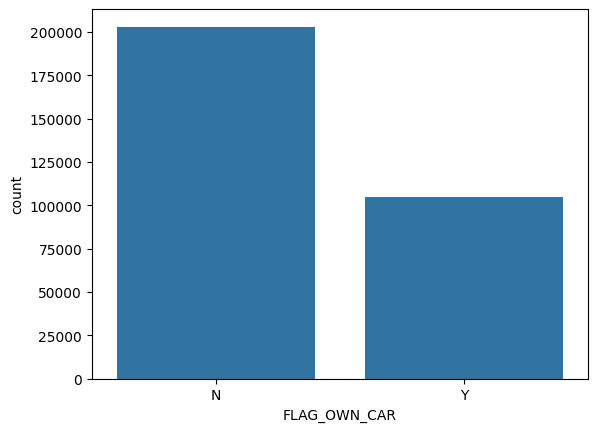

In [22]:
sns.countplot(x='FLAG_OWN_CAR', data=train_df)

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

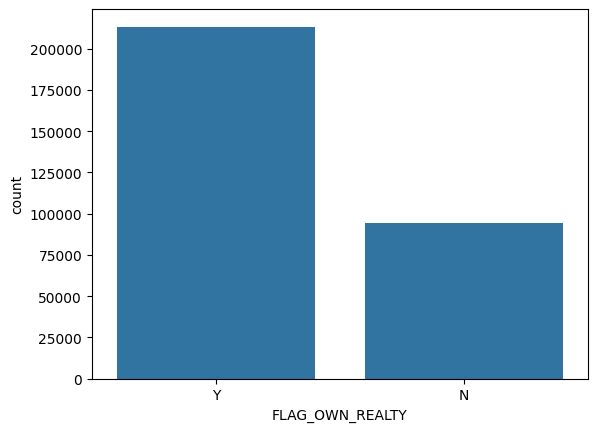

In [23]:
sns.countplot(x='FLAG_OWN_REALTY', data=train_df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

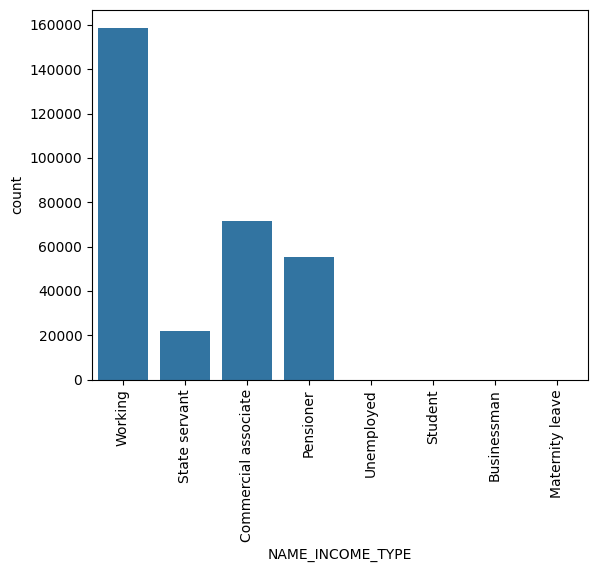

In [24]:
sns.countplot(x='NAME_INCOME_TYPE', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

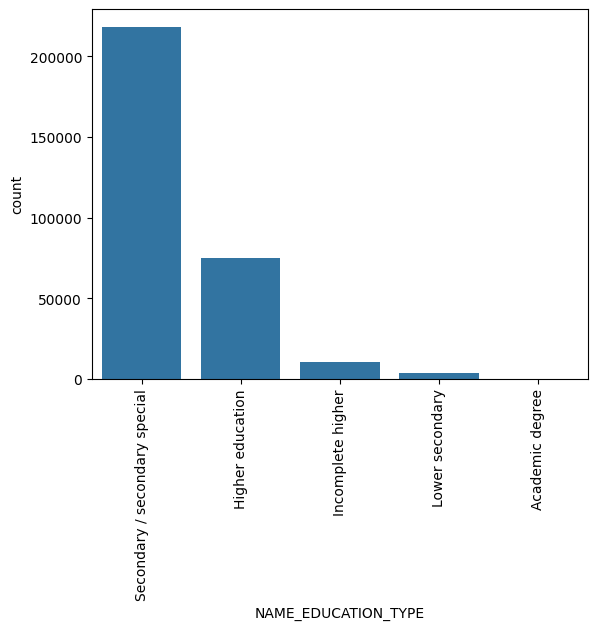

In [25]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Single / not married'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Unknown')])

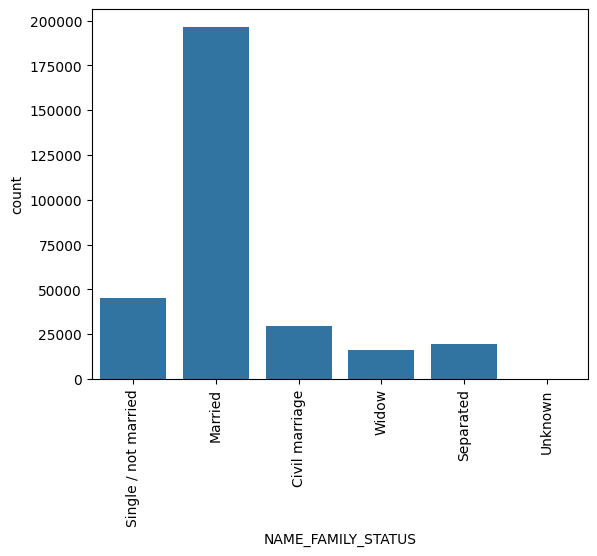

In [26]:
sns.countplot(x='NAME_FAMILY_STATUS', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

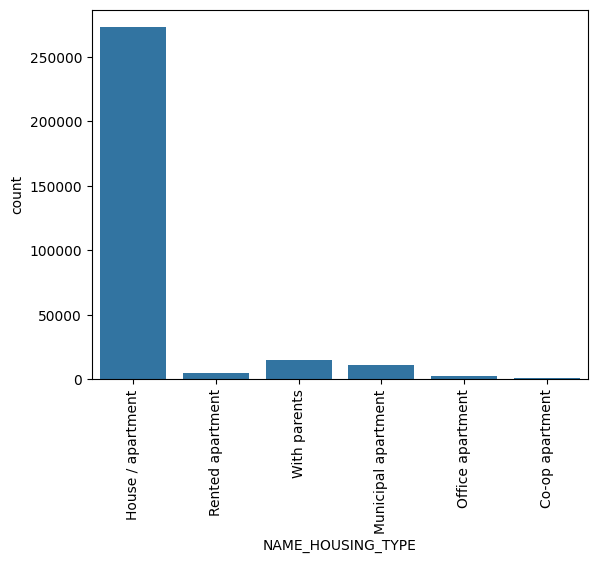

In [27]:
sns.countplot(x='NAME_HOUSING_TYPE', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

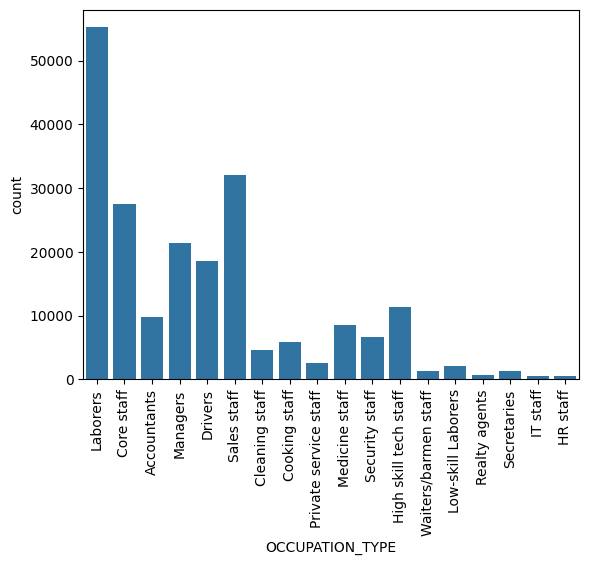

In [28]:
sns.countplot(x='OCCUPATION_TYPE', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'WEDNESDAY'),
  Text(1, 0, 'MONDAY'),
  Text(2, 0, 'THURSDAY'),
  Text(3, 0, 'SUNDAY'),
  Text(4, 0, 'SATURDAY'),
  Text(5, 0, 'FRIDAY'),
  Text(6, 0, 'TUESDAY')])

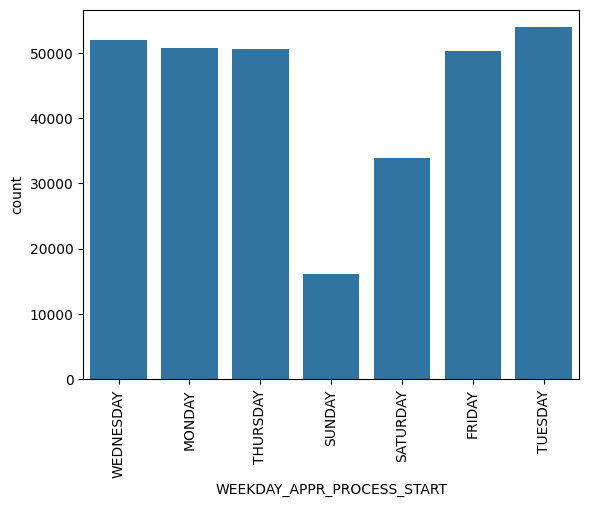

In [29]:
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=train_df)
plt.xticks(rotation=90)

In [29]:
org_type = train_df.groupby(['ORGANIZATION_TYPE']).size().sort_values(ascending=False)
org_type

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [31]:
org_type_group = train_df.groupby(['ORGANIZATION_TYPE_GROUPED']).size().sort_values(ascending=False)
org_type_group

ORGANIZATION_TYPE_GROUPED
Business               84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning         

### Visualizando Variáveis Numéricas

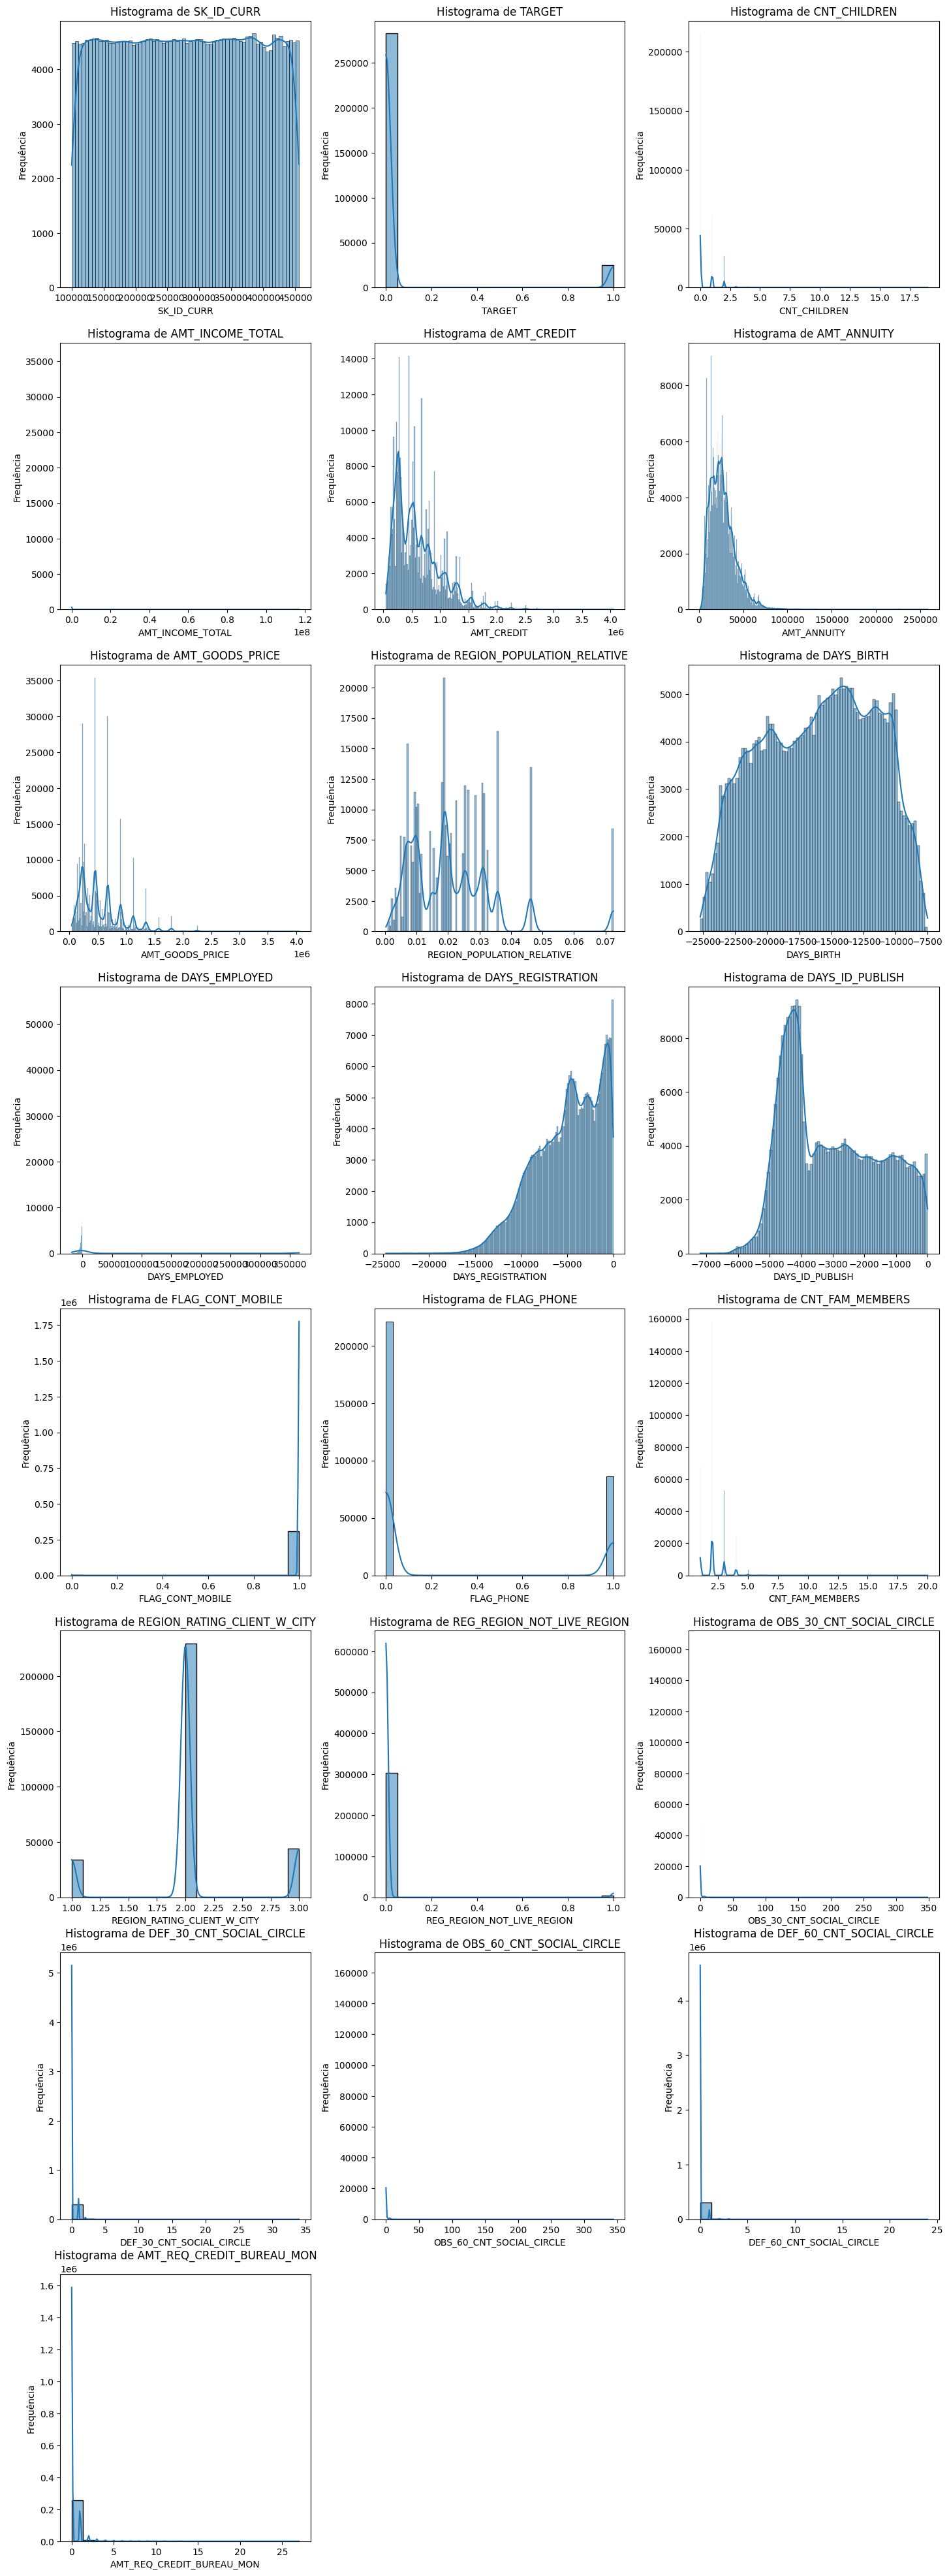

In [ ]:
# Plotando Histogramas das variáveis numéricas
colunas_numericas = train_df.select_dtypes(include=['int64', 'float64']).columns

# Configurar a figura e os subplots
num_cols = len(colunas_numericas) 
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os histogramas
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    sns.histplot(train_df[coluna], kde=True, ax=ax)  
    ax.set_title(f'Histograma de {coluna}')  
    ax.set_xlabel(coluna)  
    ax.set_ylabel('Frequência')  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

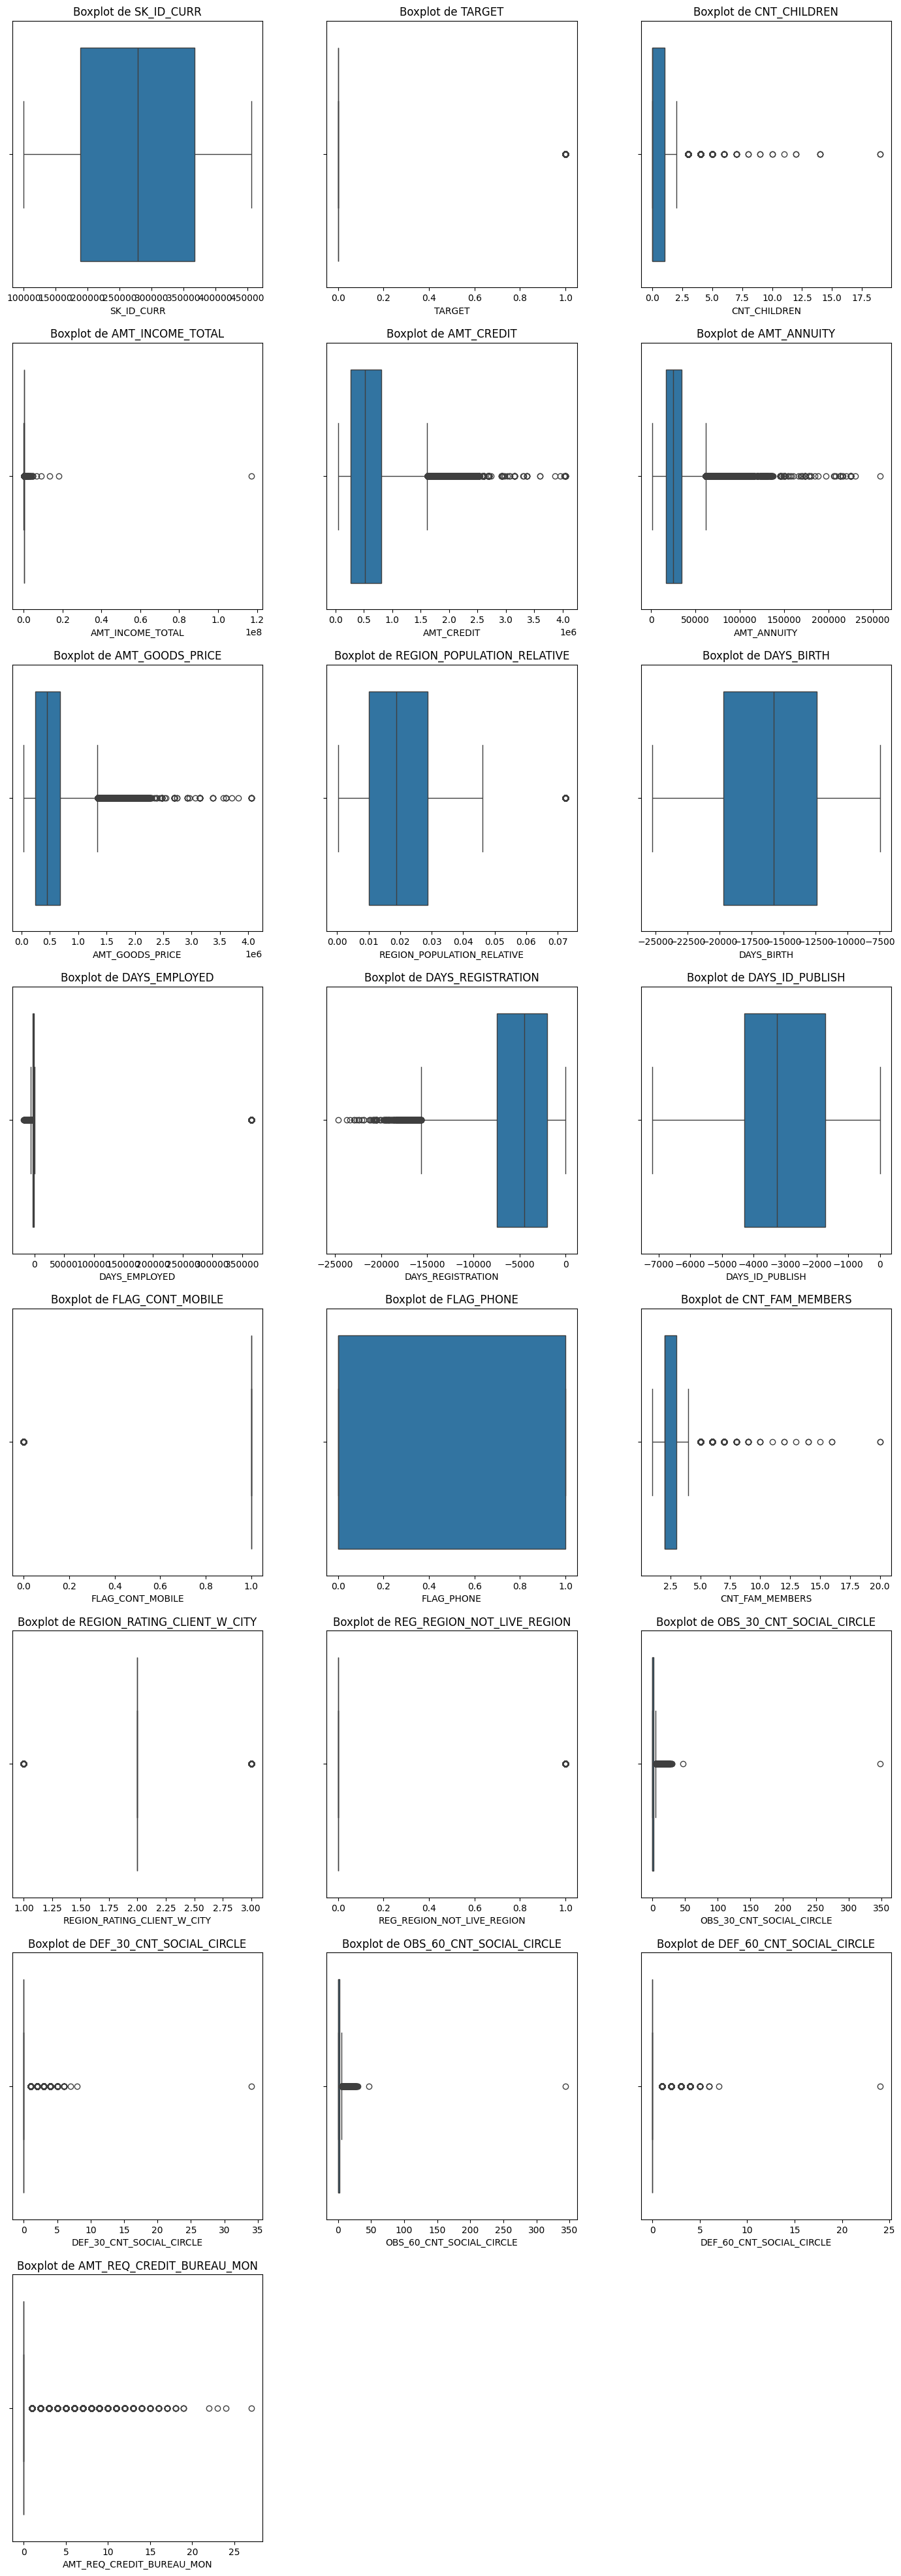

In [38]:
# Plotando gráficos de Boxplot
num_cols = len(colunas_numericas)  
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os boxplots
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col]  
    sns.boxplot(x=train_df[coluna], ax=ax)  
    ax.set_title(f'Boxplot de {coluna}')  
    ax.set_xlabel(coluna)  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

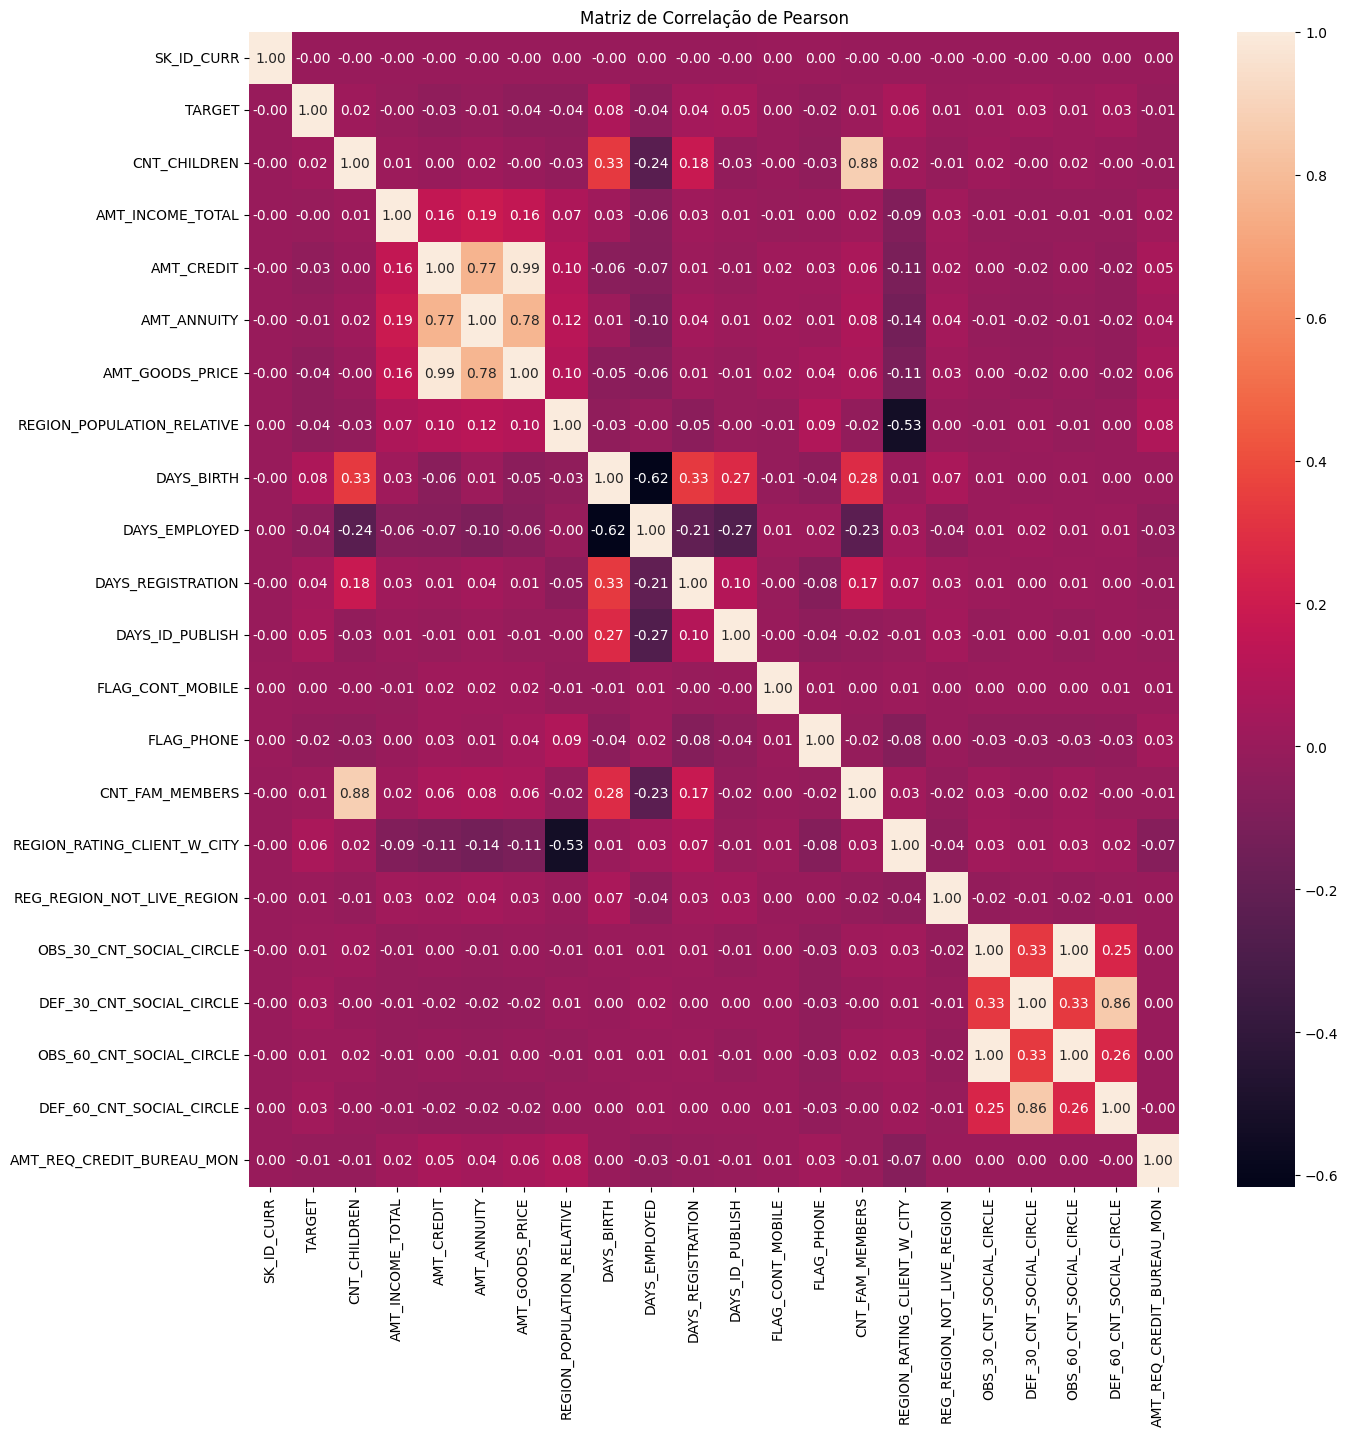

In [43]:
# Plotando Gráfico de Correlação de Pearson
plt.figure(figsize=(15,15))

correlation_matrix_pearson = train_df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix_pearson, annot=True, fmt='.2f')

plt.title("Matriz de Correlação de Pearson")
plt.show()

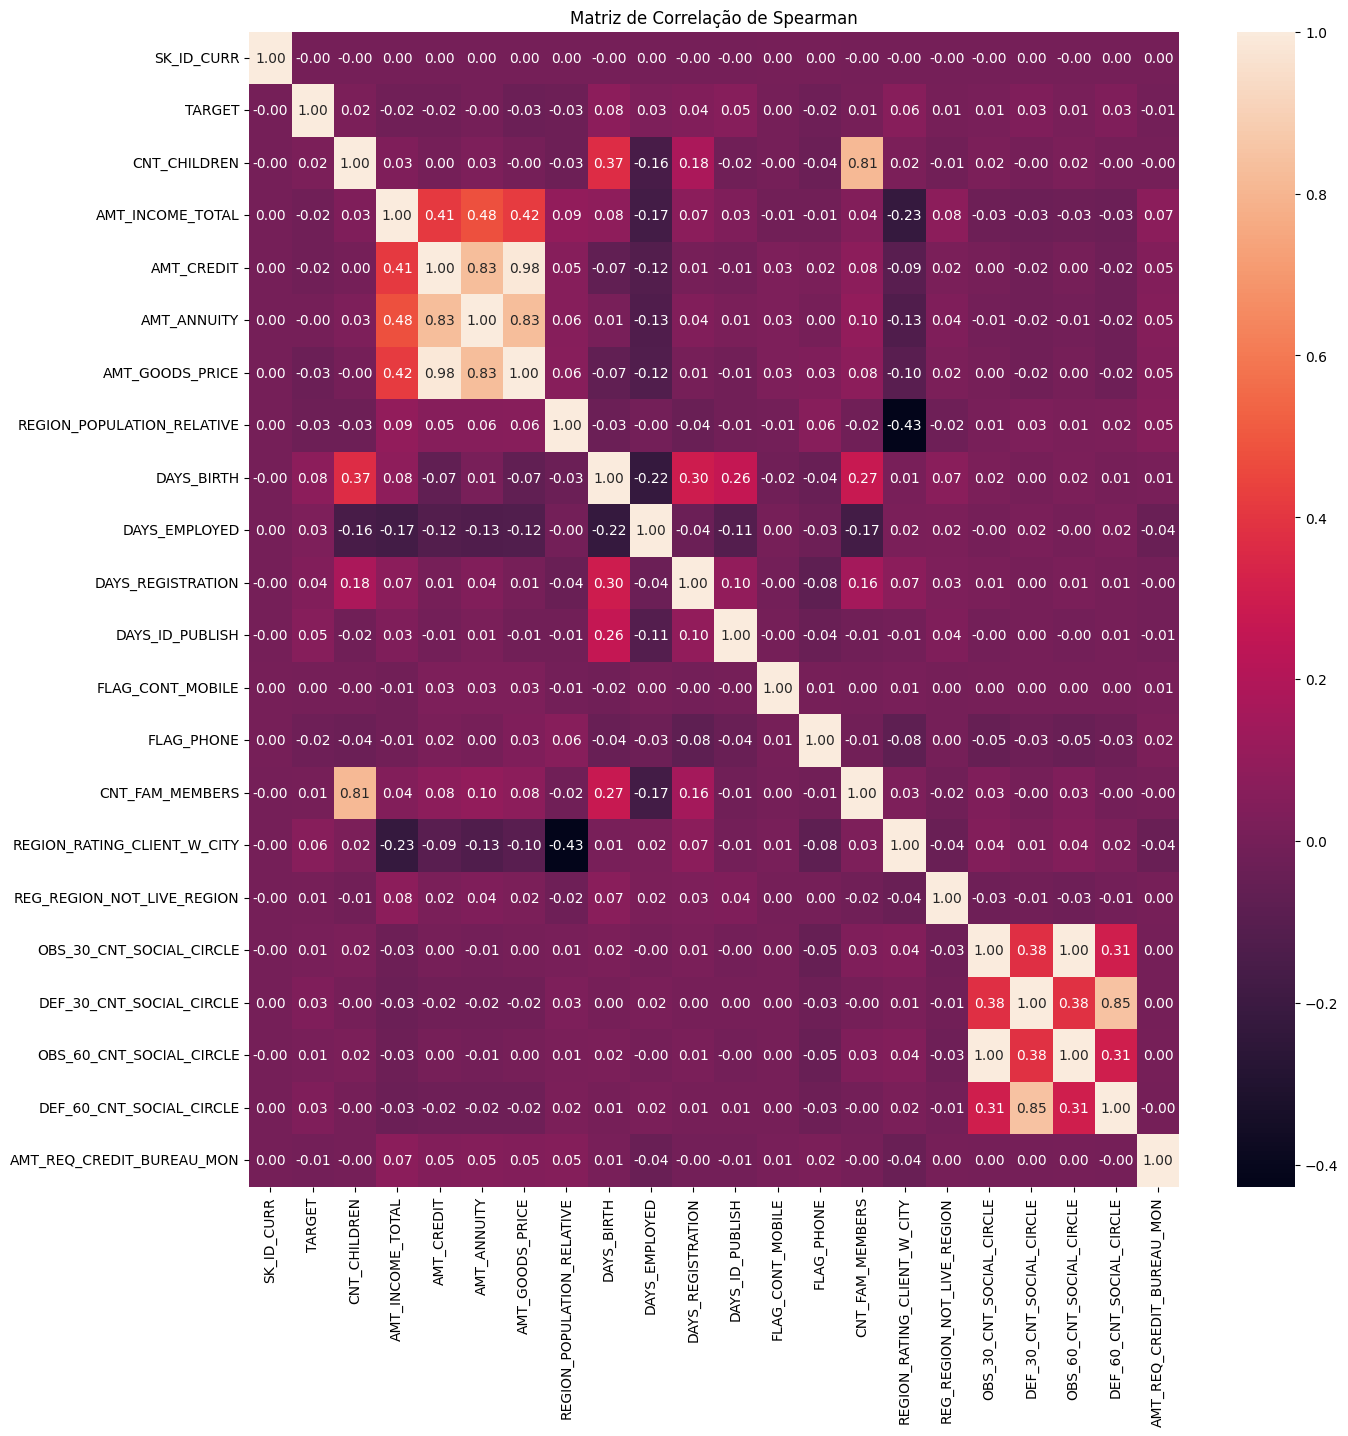

In [44]:
# Plotando Gráfico de Correlação de Spearman
plt.figure(figsize=(15,15))

correlation_matrix_spearman = train_df.corr(method='spearman', numeric_only=True)
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f')

plt.title("Matriz de Correlação de Spearman")
plt.show()

### Valores Nulos e Duplicados

In [45]:
# Verificando a ocorrência de valores nulos
train_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
O

In [47]:
train_df.duplicated().sum()

np.int64(0)

## Bureau

In [52]:
bureau_df.shape

(1716428, 10)

Após retirar algumas colunas, como mencionado acima, restaram 10 variáveis das 17 do dataset de bureau.

In [53]:
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   CNT_CREDIT_PROLONG      int64  
 6   AMT_CREDIT_SUM          float64
 7   AMT_CREDIT_SUM_DEBT     float64
 8   AMT_CREDIT_SUM_OVERDUE  float64
 9   CREDIT_TYPE             object 
dtypes: float64(3), int64(5), object(2)
memory usage: 131.0+ MB


In [54]:
bureau_df.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716415e+06,1.458759e+06,1.716428e+06
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,6.410406e-03,3.549946e+05,1.370851e+05,3.791276e+01
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,9.622391e-02,1.149811e+06,6.774011e+05,5.937650e+03
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,9.000000e+00,5.850000e+08,1.701000e+08,3.756681e+06


### Variáveis Categóricas

<Axes: xlabel='CREDIT_ACTIVE', ylabel='count'>

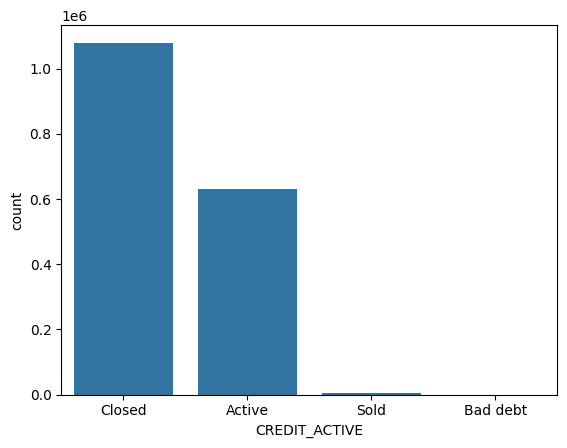

In [55]:
# Plotando gráfico de Crédito Ativo
sns.countplot(x='CREDIT_ACTIVE', data=bureau_df)

In [59]:
credit_active = bureau_df.groupby(['CREDIT_ACTIVE']).size().sort_values(ascending=False)
credit_active

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
dtype: int64

In [57]:
credit_type = bureau_df.groupby(['CREDIT_TYPE']).size().sort_values(ascending=False)
credit_type

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
dtype: int64

In [62]:
# Após transformação
credit_type = bureau_df.groupby(['CREDIT_TYPE']).size().sort_values(ascending=False)
credit_type

CREDIT_TYPE
Consumer credit    1251615
Credit card         402195
Car loan             27690
Mortgage             18391
Microloan            12413
Other loans           4124
dtype: int64

### Variáveis Numéricas

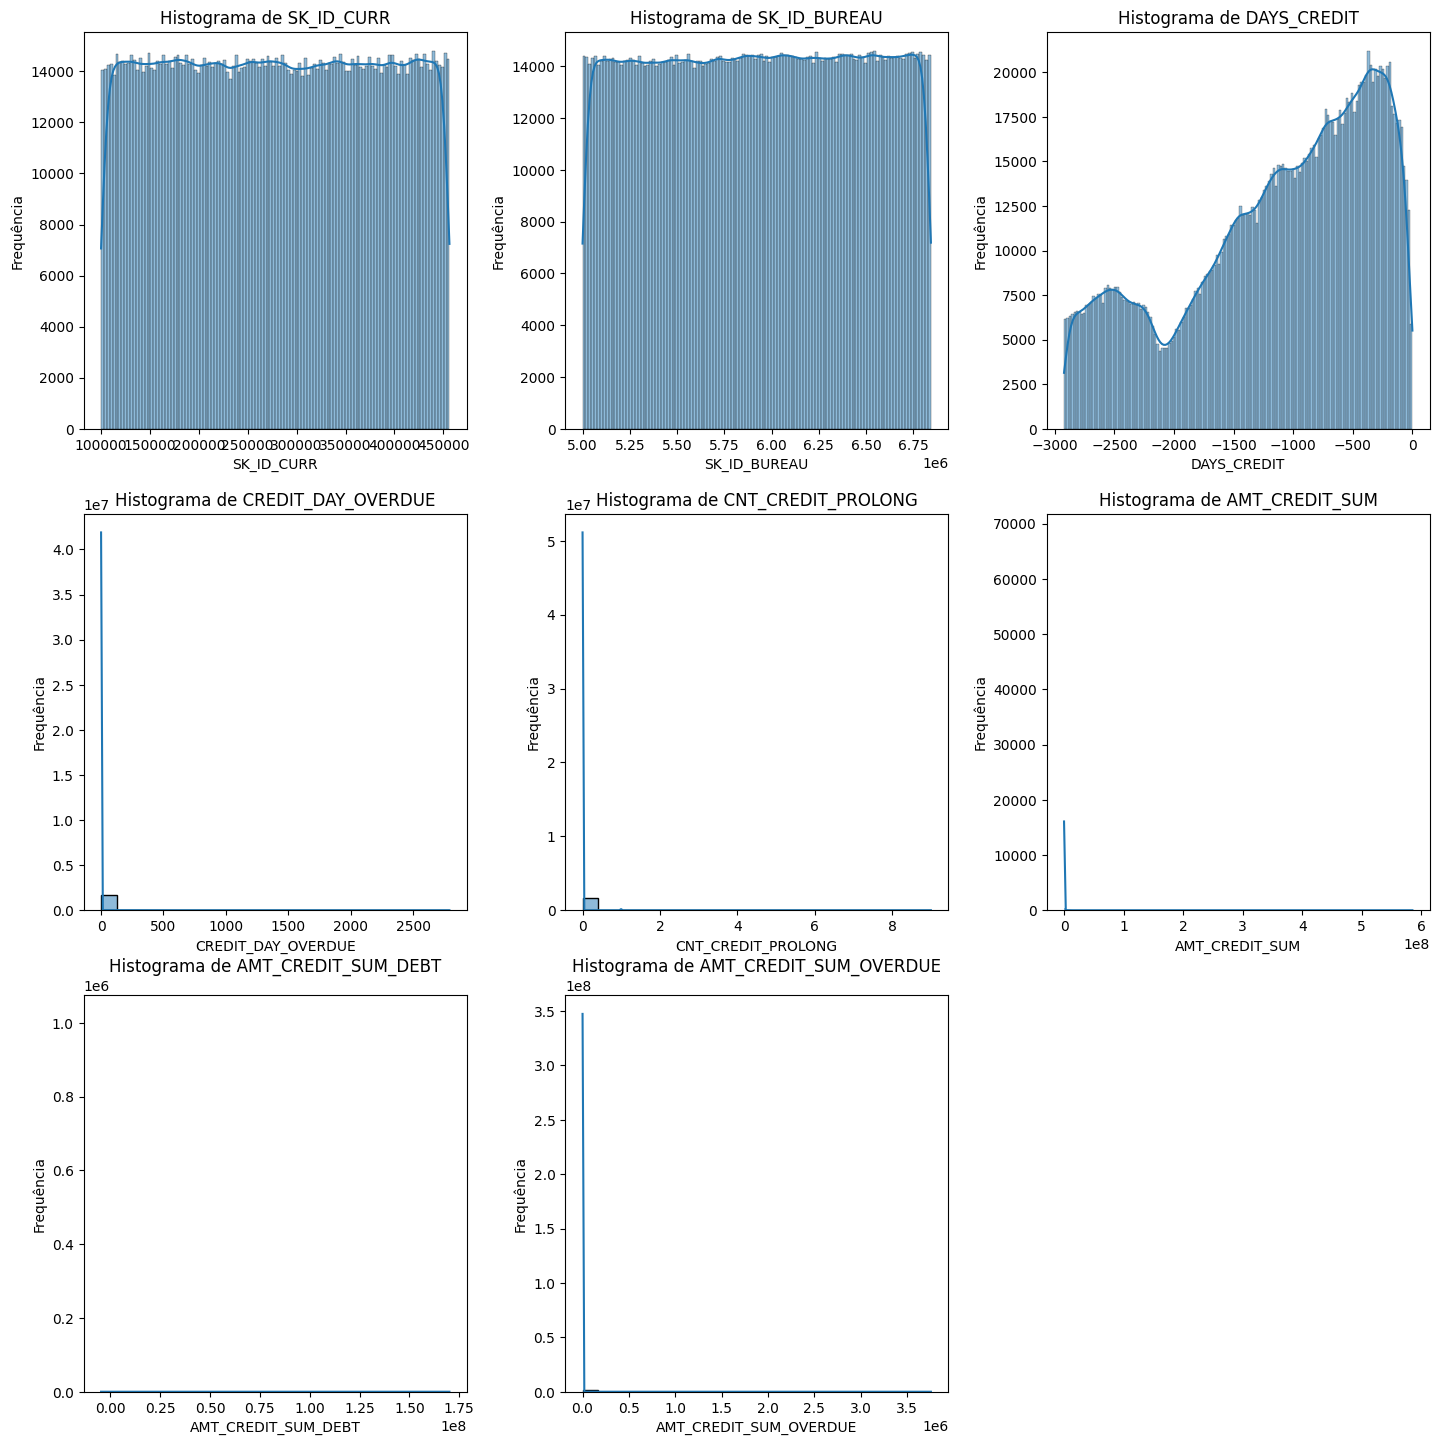

In [63]:
# Plotando Histogramas das variáveis numéricas
colunas_numericas = bureau_df.select_dtypes(include=['int64', 'float64']).columns

# Configurar a figura e os subplots
num_cols = len(colunas_numericas) 
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os histogramas
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    sns.histplot(bureau_df[coluna], kde=True, ax=ax)  
    ax.set_title(f'Histograma de {coluna}')  
    ax.set_xlabel(coluna)  
    ax.set_ylabel('Frequência')  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

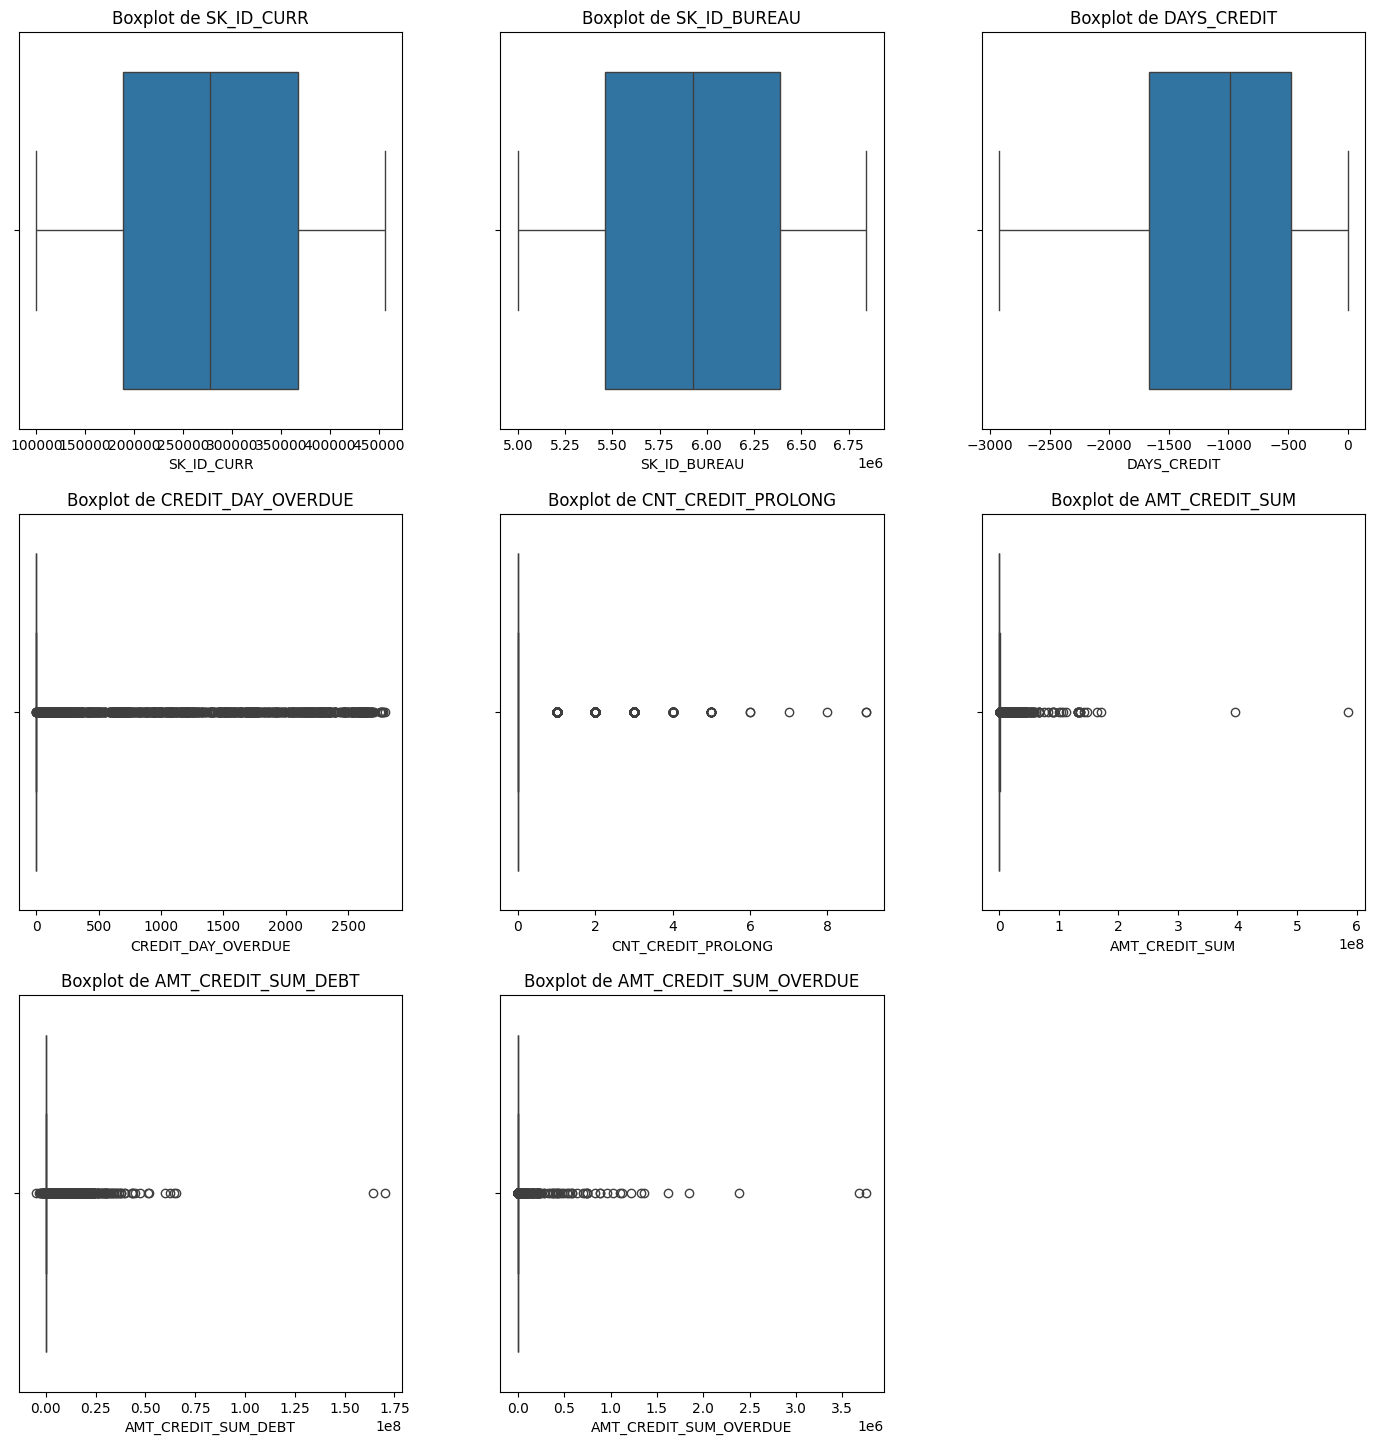

In [66]:
# Plotando gráficos de Boxplot
num_cols = len(colunas_numericas)  
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os boxplots
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col]  
    sns.boxplot(x=bureau_df[coluna], ax=ax)  
    ax.set_title(f'Boxplot de {coluna}')  
    ax.set_xlabel(coluna)  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

### Valores Nulos e Duplicados

In [67]:
bureau_df.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257669
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
dtype: int64

In [68]:
bureau_df.duplicated().sum()

np.int64(0)

## Credit Card Balance

In [73]:
credit_df.shape

(3840312, 15)

Após retirar algumas colunas, como mencionado acima, restaram 15 variáveis das 23 do dataset de credit card balance.

In [74]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   SK_ID_PREV                 int64  
 1   SK_ID_CURR                 int64  
 2   MONTHS_BALANCE             int64  
 3   AMT_BALANCE                float64
 4   AMT_CREDIT_LIMIT_ACTUAL    int64  
 5   AMT_DRAWINGS_CURRENT       float64
 6   AMT_INST_MIN_REGULARITY    float64
 7   AMT_PAYMENT_CURRENT        float64
 8   AMT_PAYMENT_TOTAL_CURRENT  float64
 9   AMT_RECIVABLE              float64
 10  AMT_TOTAL_RECEIVABLE       float64
 11  CNT_DRAWINGS_CURRENT       int64  
 12  NAME_CONTRACT_STATUS       object 
 13  SK_DPD                     int64  
 14  SK_DPD_DEF                 int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 439.5+ MB


In [75]:
credit_df.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,7.433388e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.808881e+04,5.809829e+04,7.031439e-01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,3.384608e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.059654e+05,1.059718e+05,3.190347e+00,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.287098e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.493338e+06,1.493338e+06,1.650000e+02,3.260000e+03,3.260000e+03


### Análise das Variáveis

In [76]:
name_contract = credit_df.groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)
name_contract

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
dtype: int64

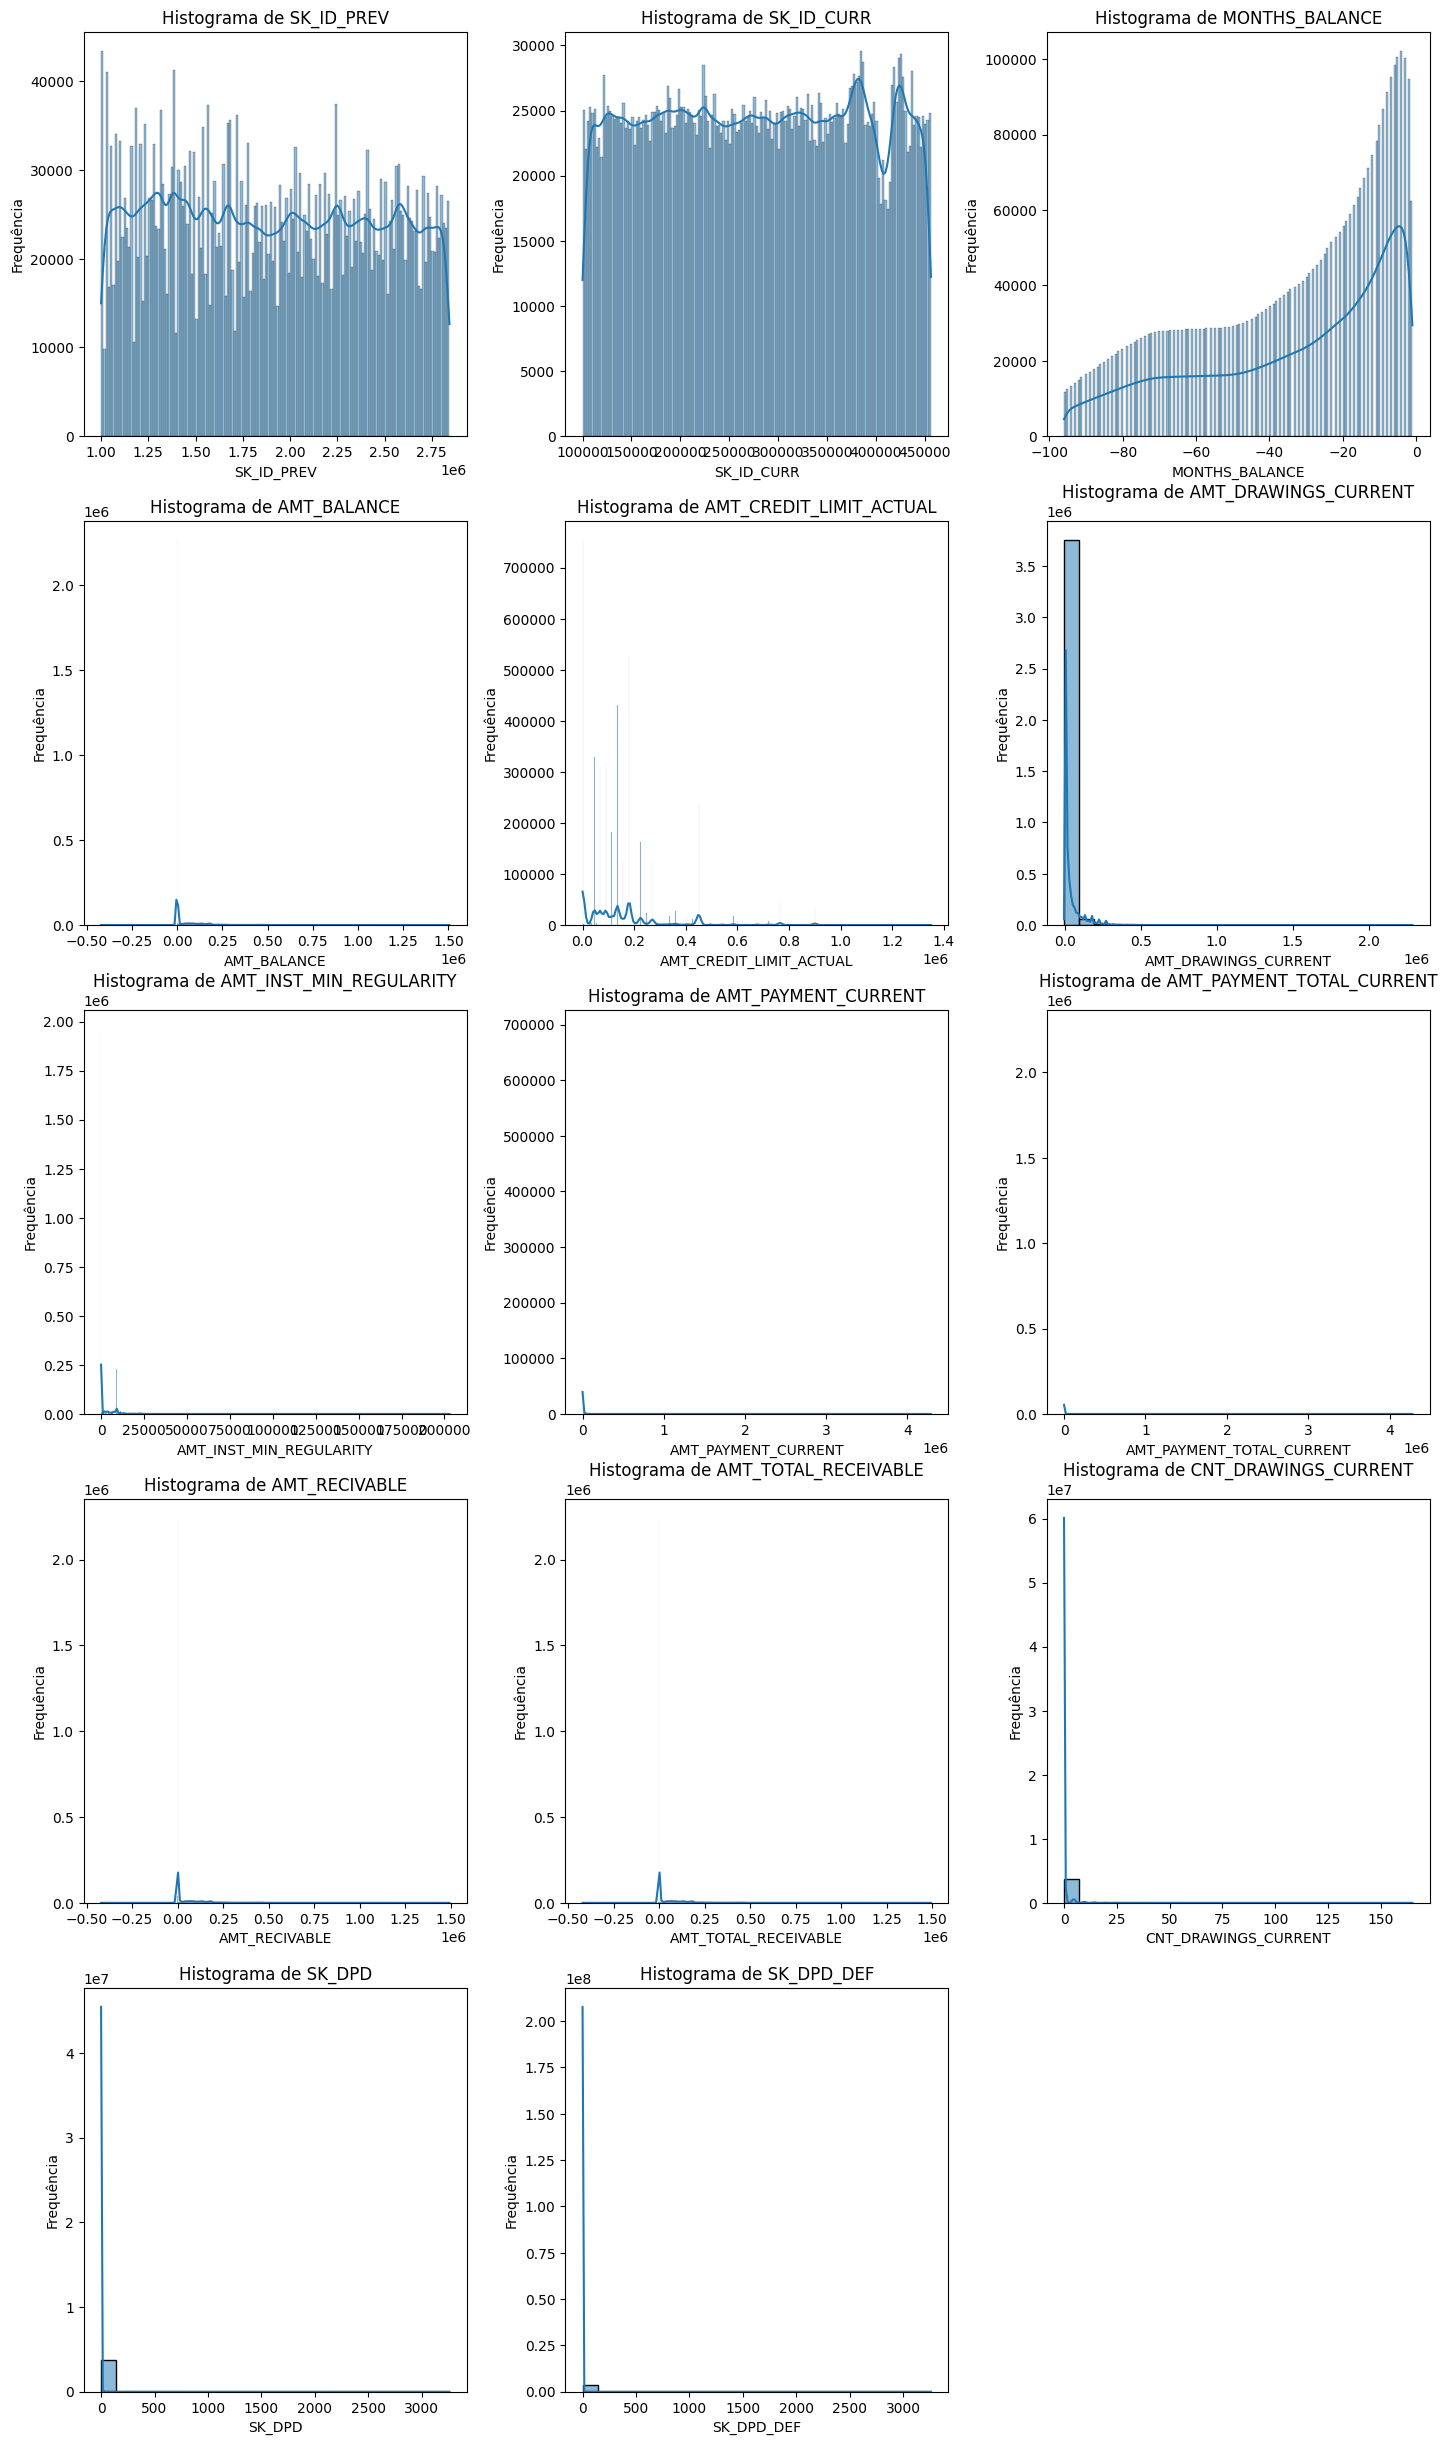

In [31]:
# Plotando Histogramas das variáveis numéricas
colunas_numericas = credit_df.select_dtypes(include=['int64', 'float64']).columns

# Configurar a figura e os subplots
num_cols = len(colunas_numericas) 
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os histogramas
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    sns.histplot(credit_df[coluna], kde=True, ax=ax)  
    ax.set_title(f'Histograma de {coluna}')  
    ax.set_xlabel(coluna)  
    ax.set_ylabel('Frequência')  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

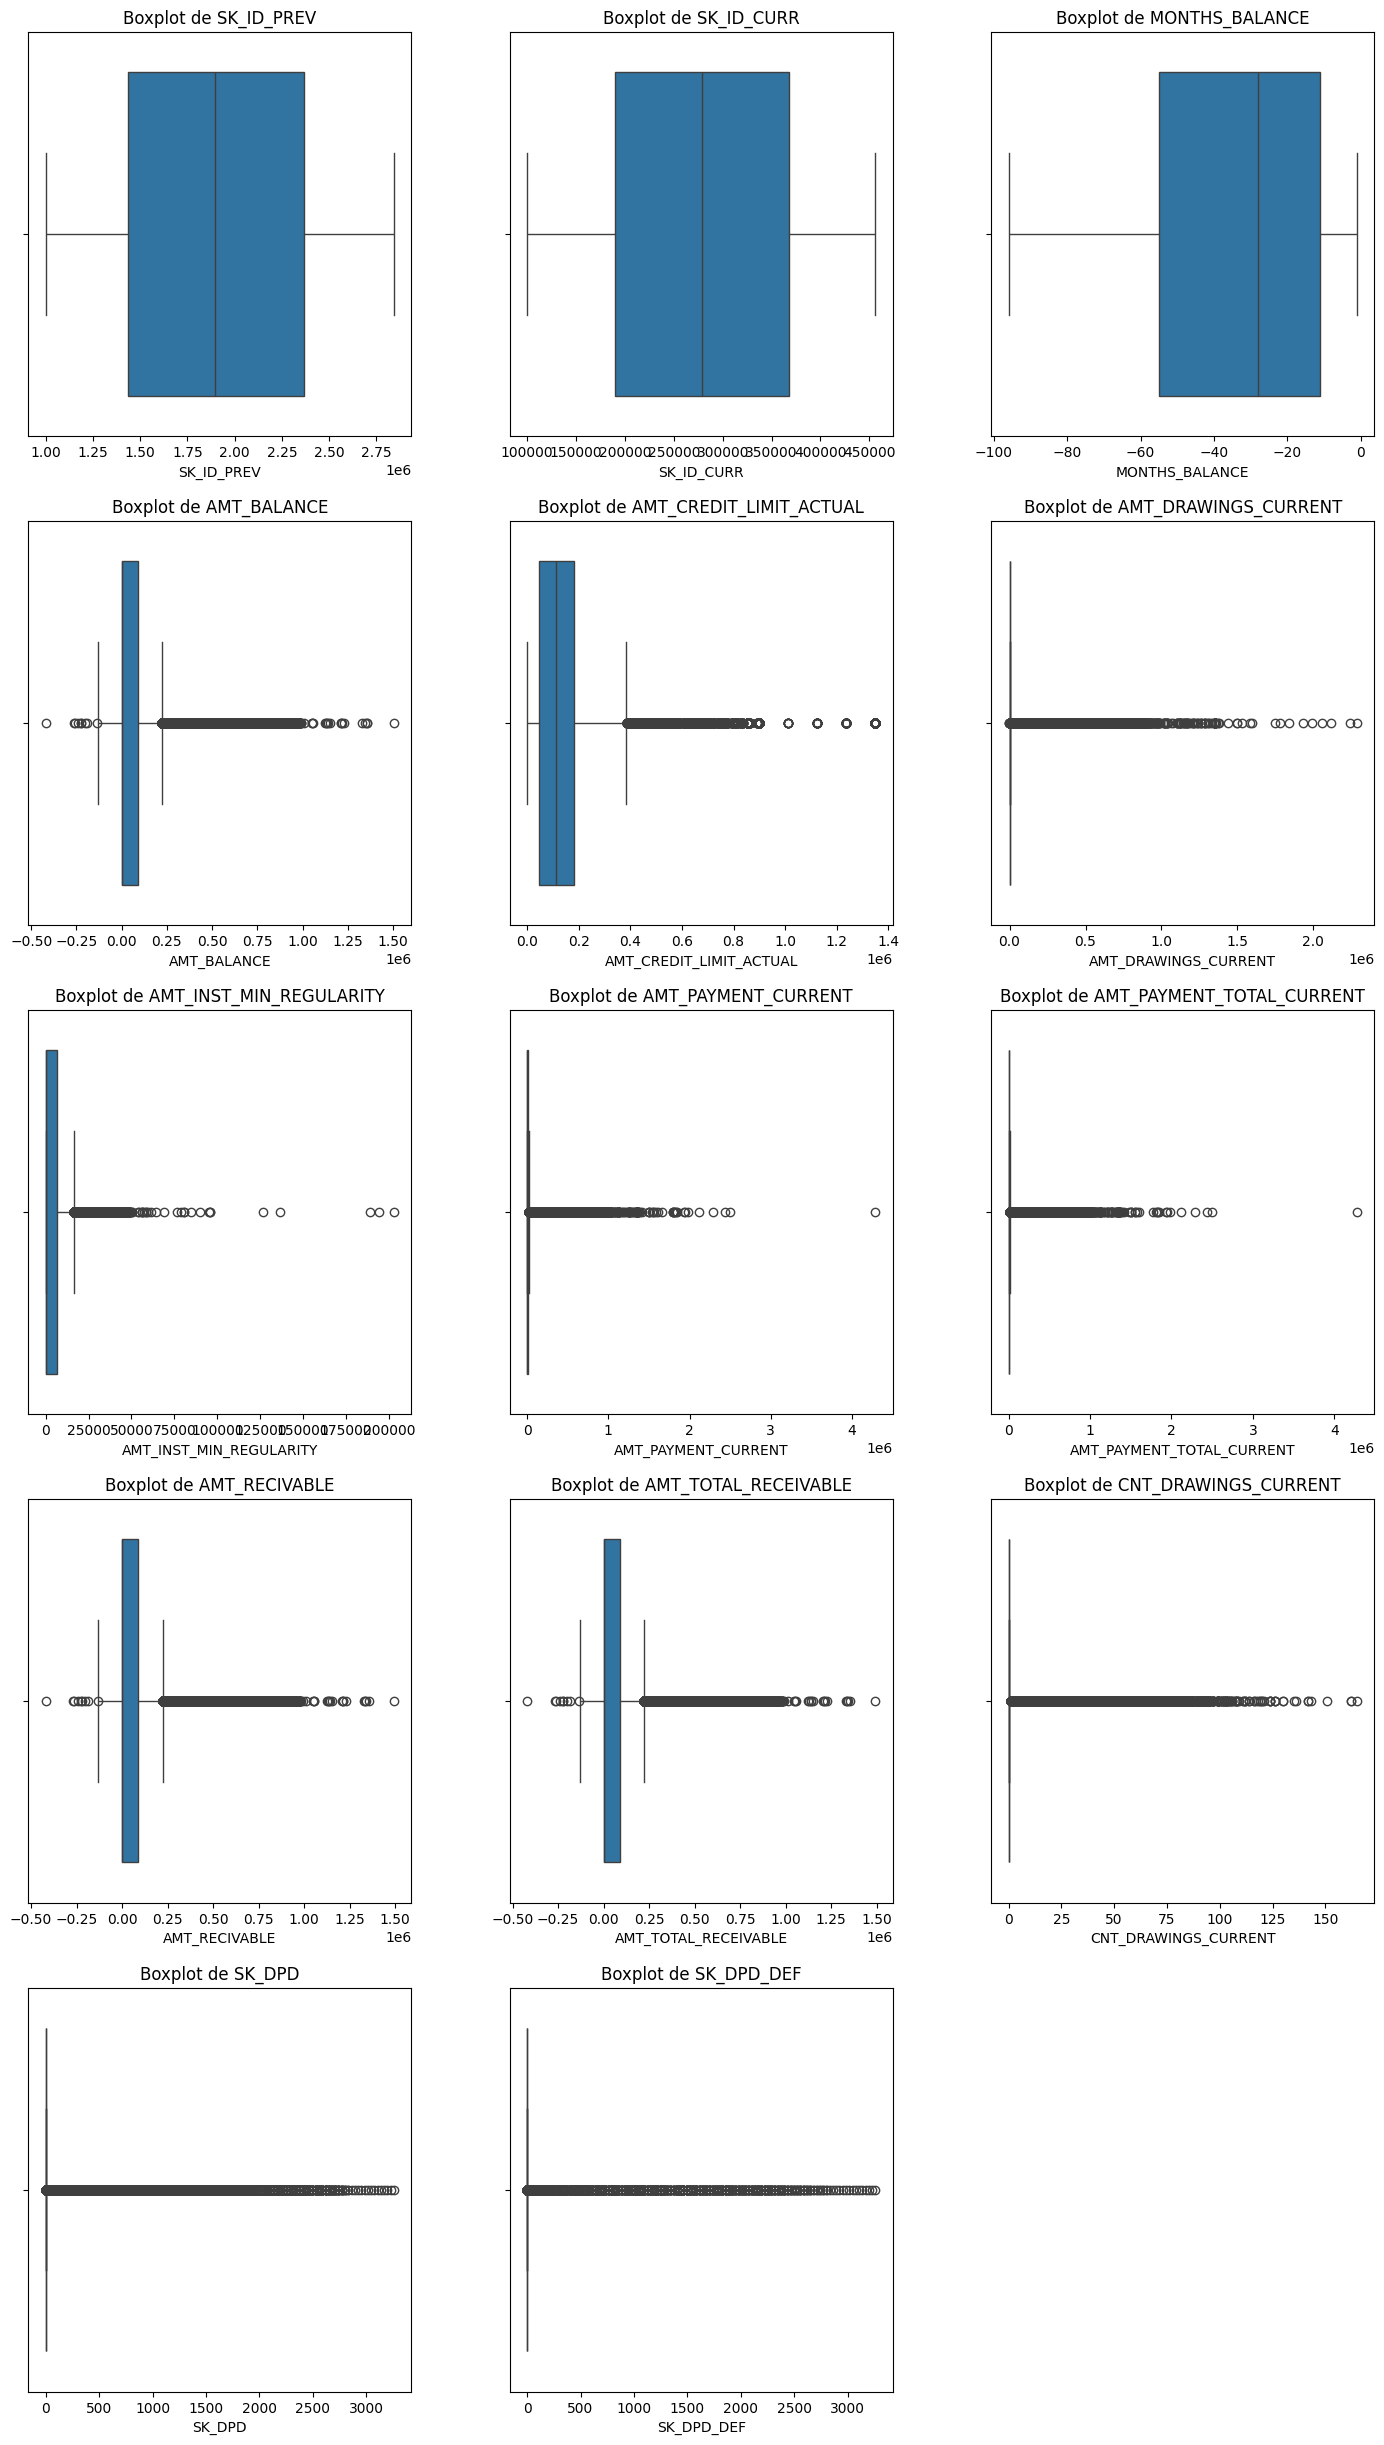

In [33]:
# Plotando gráficos de Boxplot
num_cols = len(colunas_numericas)  
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os boxplots
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col]  
    sns.boxplot(x=credit_df[coluna], ax=ax)  
    ax.set_title(f'Boxplot de {coluna}')  
    ax.set_xlabel(coluna)  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

### Valores Nulos e Duplicados

In [34]:
credit_df.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_DRAWINGS_CURRENT              0
AMT_INST_MIN_REGULARITY      305236
AMT_PAYMENT_CURRENT          767988
AMT_PAYMENT_TOTAL_CURRENT         0
AMT_RECIVABLE                     0
AMT_TOTAL_RECEIVABLE              0
CNT_DRAWINGS_CURRENT              0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
dtype: int64

In [35]:
credit_df.duplicated().sum()

np.int64(0)

## Previous Application

In [39]:
previous_df.shape

(1670214, 7)

In [40]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   SK_ID_PREV         1670214 non-null  int64  
 1   SK_ID_CURR         1670214 non-null  int64  
 2   AMT_APPLICATION    1670214 non-null  float64
 3   AMT_DOWN_PAYMENT   774370 non-null   float64
 4   DAYS_DECISION      1670214 non-null  int64  
 5   NAME_PAYMENT_TYPE  1670214 non-null  object 
 6   CNT_PAYMENT        1297984 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 89.2+ MB


In [41]:
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,7.743700e+05,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,6.697402e+03,-8.806797e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,2.927798e+05,2.092150e+04,7.790997e+02,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,-9.000000e-01,-2.922000e+03,0.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,0.000000e+00,-1.300000e+03,6.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,1.638000e+03,-5.810000e+02,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.803600e+05,7.740000e+03,-2.800000e+02,2.400000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,3.060045e+06,-1.000000e+00,8.400000e+01


### Análise das Variáveis

In [43]:
name_payment = previous_df.groupby(['NAME_PAYMENT_TYPE']).size().sort_values(ascending=False)
name_payment

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
dtype: int64

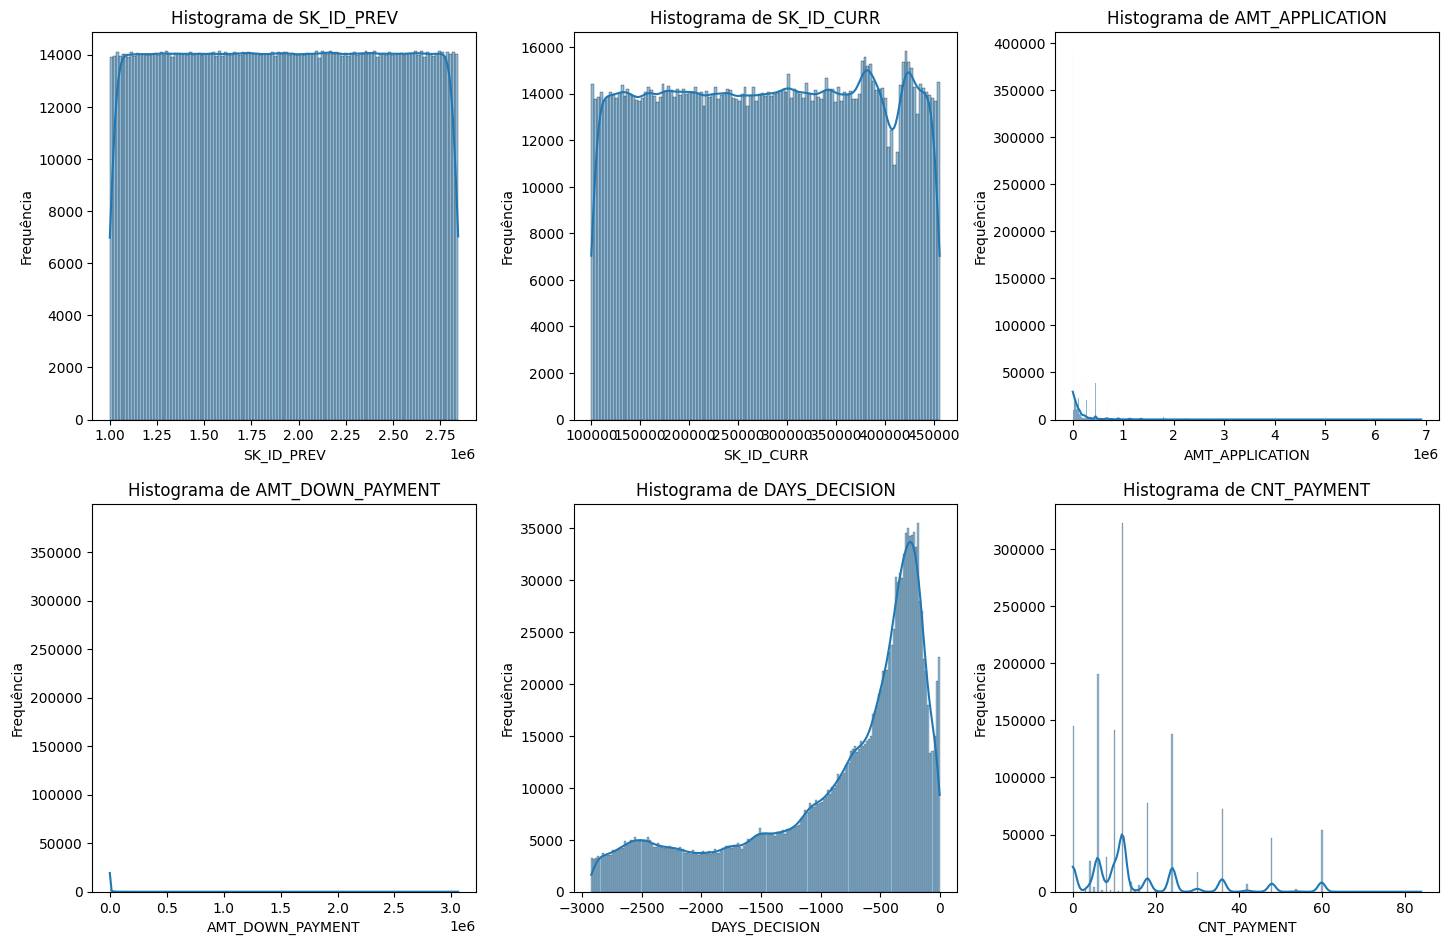

In [44]:
# Plotando Histogramas das variáveis numéricas
colunas_numericas = previous_df.select_dtypes(include=['int64', 'float64']).columns

# Configurar a figura e os subplots
num_cols = len(colunas_numericas) 
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os histogramas
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    sns.histplot(previous_df[coluna], kde=True, ax=ax)  
    ax.set_title(f'Histograma de {coluna}')  
    ax.set_xlabel(coluna)  
    ax.set_ylabel('Frequência')  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

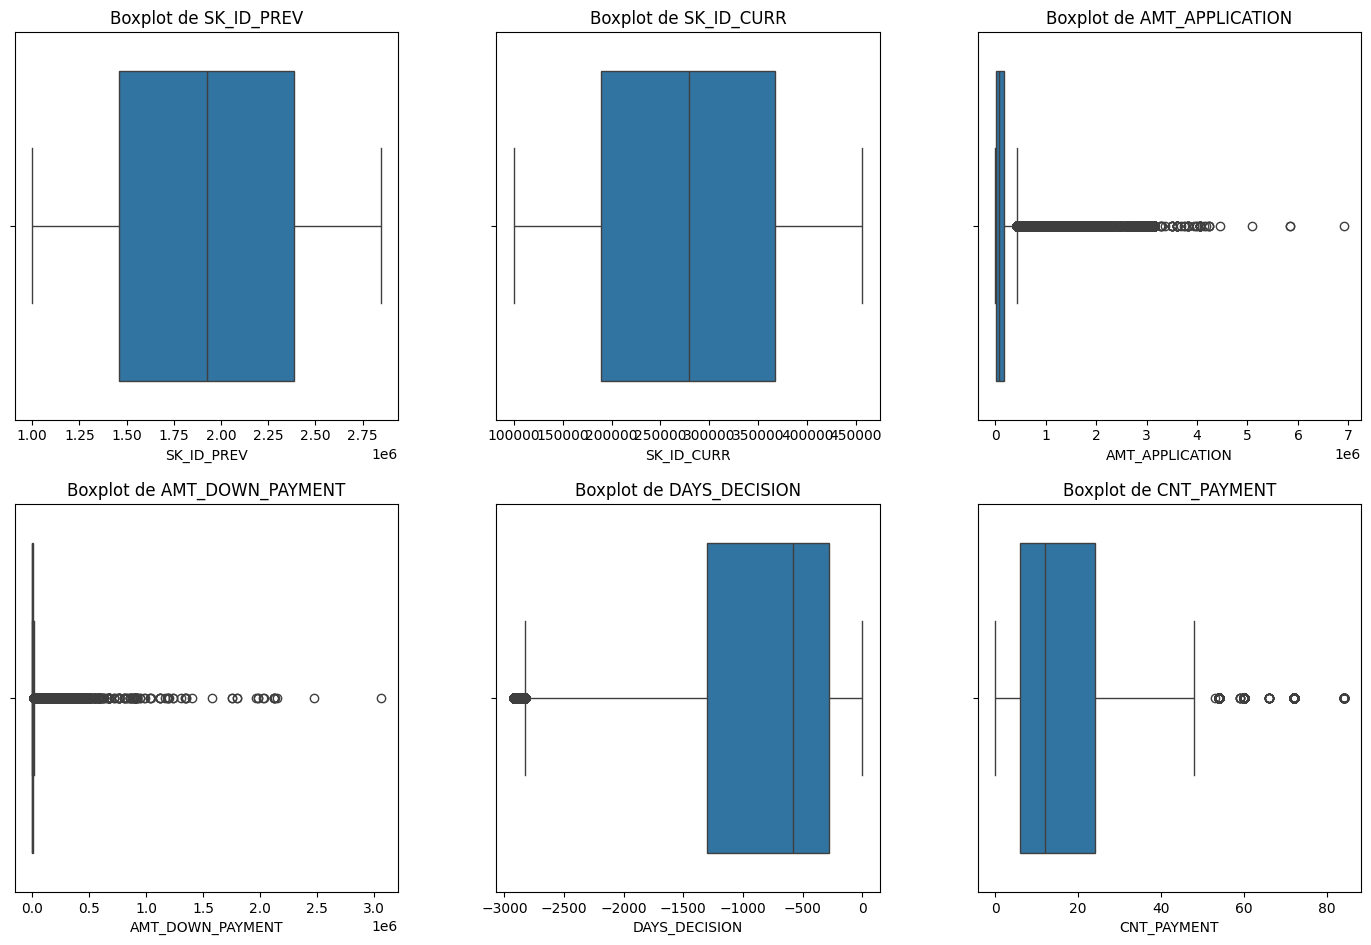

In [45]:
# Plotando gráficos de Boxplot
num_cols = len(colunas_numericas)  
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os boxplots
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col]  
    sns.boxplot(x=previous_df[coluna], ax=ax)  
    ax.set_title(f'Boxplot de {coluna}')  
    ax.set_xlabel(coluna)  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

## Merge e Considerações

Durante a Análise Exploratória de Dados (EDA), foram analisados **4 datasets principais**:

 - `application_train`: Dados principais dos clientes e informações sobre o empréstimo atual.

 - `bureau`: Histórico de créditos anteriores dos clientes, registrados em bureau de crédito.

 - `credit_card_balance`: Informações sobre o saldo e transações de cartões de crédito.

 - `previous_application`: Dados sobre solicitações de crédito anteriores dos clientes.

**Remoção de Features e Engenharia de Atributos**

 - Remoção de colunas: Diversas colunas foram removidas dos datasets por serem redundantes, pouco relevantes ou já estarem presentes em outros datasets. Detalhes sobre as colunas removidas podem ser encontrados nos tópicos **"Removendo Features"** e **"Engenharia de Atributos"**.

 - Transformações: Algumas variáveis categóricas com muitas categorias e poucas observações foram agrupadas para simplificar a análise e reduzir a dimensionalidade. Por exemplo, categorias como `Another type of loan` e `Unknown type of loan` foram agrupadas em `Other loans`.

**Decisões sobre Variáveis de Data**

 - As variáveis de data (ex: `DAYS_BIRTH`, `DAYS_EMPLOYED`) foram mantidas em sua forma original (valores negativos representando dias antes da data de referência).

 - Inicialmente, considerei transformar essas variáveis dividindo-as por 365 para converter dias em anos. No entanto, optei por mantê-las em dias para preservar a precisão da informação e evitar possíveis perdas de significado.

**Tratamento de Outliers**

 Através da análise de boxplots, foi possível identificar a presença de muitos outliers nas variáveis numéricas.

 Decidi não remover ou tratar os outliers por dois motivos principais:

  - A remoção de outliers eliminaria muitas linhas do dataset, o que poderia impactar negativamente a qualidade e a quantidade dos dados disponíveis para modelagem.

  - Optei por utilizar algoritmos de machine learning que são robustos a outliers, como XGBoost, que conseguem lidar bem com essas anomalias sem a necessidade de intervenção manual.

In [109]:
# Merge dos 3 datasets com o principal application train -> Usar Agregação

# Agregar o bureau_df por SK_ID_CURR
bureau_agg = bureau_df.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['min', 'max', 'mean'],  
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    'AMT_CREDIT_SUM_OVERDUE': ['sum', 'mean'],
    'CREDIT_TYPE': ['nunique']  # Número de categorias de crédito distintos
}).reset_index()

# Renomear as colunas agregadas
bureau_agg.columns = [
    'SK_ID_CURR',
    'BUREAU_DAYS_CREDIT_MIN', 'BUREAU_DAYS_CREDIT_MAX', 'BUREAU_DAYS_CREDIT_MEAN',
    'BUREAU_CREDIT_DAY_OVERDUE_MAX', 'BUREAU_CREDIT_DAY_OVERDUE_MEAN',
    'BUREAU_CNT_CREDIT_PROLONG_SUM',
    'BUREAU_AMT_CREDIT_SUM_SUM', 'BUREAU_AMT_CREDIT_SUM_MEAN',
    'BUREAU_AMT_CREDIT_SUM_DEBT_SUM', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
    'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN',
    'BUREAU_CREDIT_TYPE_NUNIQUE'
]

# Agregar o credit_df por SK_ID_CURR
credit_agg = credit_df.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max'],  
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'max'],
    'AMT_DRAWINGS_CURRENT': ['sum', 'mean'],
    'AMT_INST_MIN_REGULARITY': ['mean'],
    'AMT_PAYMENT_CURRENT': ['sum', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['sum', 'mean'],
    'AMT_RECIVABLE': ['mean'],
    'AMT_TOTAL_RECEIVABLE': ['mean'],
    'CNT_DRAWINGS_CURRENT': ['sum'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}).reset_index()

# Renomear as colunas agregadas
credit_agg.columns = [
    'SK_ID_CURR',
    'CCB_MONTHS_BALANCE_MIN', 'CCB_MONTHS_BALANCE_MAX',
    'CCB_AMT_BALANCE_MEAN', 'CCB_AMT_BALANCE_MAX',
    'CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN', 'CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX',
    'CCB_AMT_DRAWINGS_CURRENT_SUM', 'CCB_AMT_DRAWINGS_CURRENT_MEAN',
    'CCB_AMT_INST_MIN_REGULARITY_MEAN',
    'CCB_AMT_PAYMENT_CURRENT_SUM', 'CCB_AMT_PAYMENT_CURRENT_MEAN',
    'CCB_AMT_PAYMENT_TOTAL_CURRENT_SUM', 'CCB_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
    'CCB_AMT_RECIVABLE_MEAN',
    'CCB_AMT_TOTAL_RECEIVABLE_MEAN',
    'CCB_CNT_DRAWINGS_CURRENT_SUM',
    'CCB_SK_DPD_MAX', 'CCB_SK_DPD_MEAN',
    'CCB_SK_DPD_DEF_MAX', 'CCB_SK_DPD_DEF_MEAN'
]

# Agregar o previous_df por SK_ID_CURR
previous_agg = previous_df.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['sum', 'mean'],  
    'AMT_DOWN_PAYMENT': ['sum', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean'],
    'NAME_PAYMENT_TYPE': ['nunique']  # Número de categorias de pagamento distintos
}).reset_index()

# Renomear as colunas agregadas
previous_agg.columns = [
    'SK_ID_CURR',
    'PREV_AMT_APPLICATION_SUM', 'PREV_AMT_APPLICATION_MEAN',
    'PREV_AMT_DOWN_PAYMENT_SUM', 'PREV_AMT_DOWN_PAYMENT_MEAN',
    'PREV_DAYS_DECISION_MIN', 'PREV_DAYS_DECISION_MAX', 'PREV_DAYS_DECISION_MEAN',
    'PREV_CNT_PAYMENT_MEAN',
    'PREV_NAME_PAYMENT_TYPE_NUNIQUE'
]

# Merge dos datasets agregados com train_df
df_final = train_df.merge(bureau_agg, on='SK_ID_CURR', how='left')
df_final = df_final.merge(credit_agg, on='SK_ID_CURR', how='left')
df_final = df_final.merge(previous_agg, on='SK_ID_CURR', how='left')

A função de agregação foi utilizada nesse caso pois um cliente presente nos demais datasets (bureau, credit..) pode ter mais de uma transação de crédito, dessa forma, se fosse feito o merge sem utilizar a função de agregação teriamos muitas linhas duplicadas.

In [110]:
df_final.shape

(307511, 76)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          307511 non-null  int64  
 1   TARGET                              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                  307511 non-null  object 
 3   CODE_GENDER                         307511 non-null  object 
 4   FLAG_OWN_CAR                        307511 non-null  object 
 5   FLAG_OWN_REALTY                     307511 non-null  object 
 6   CNT_CHILDREN                        307511 non-null  int64  
 7   AMT_INCOME_TOTAL                    307511 non-null  float64
 8   AMT_CREDIT                          307511 non-null  float64
 9   AMT_ANNUITY                         307499 non-null  float64
 10  AMT_GOODS_PRICE                     307233 non-null  float64
 11  NAME_INCOME_TYPE          

In [16]:
df_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,ORGANIZATION_TYPE_GROUPED,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_CREDIT_TYPE_NUNIQUE,CCB_MONTHS_BALANCE_MIN,CCB_MONTHS_BALANCE_MAX,CCB_AMT_BALANCE_MEAN,CCB_AMT_BALANCE_MAX,CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX,CCB_AMT_DRAWINGS_CURRENT_SUM,CCB_AMT_DRAWINGS_CURRENT_MEAN,CCB_AMT_INST_MIN_REGULARITY_MEAN,CCB_AMT_PAYMENT_CURRENT_SUM,CCB_AMT_PAYMENT_CURRENT_MEAN,CCB_AMT_PAYMENT_TOTAL_CURRENT_SUM,CCB_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CCB_AMT_RECIVABLE_MEAN,CCB_AMT_TOTAL_RECEIVABLE_MEAN,CCB_CNT_DRAWINGS_CURRENT_SUM,CCB_SK_DPD_MAX,CCB_SK_DPD_MEAN,CCB_SK_DPD_DEF_MAX,CCB_SK_DPD_DEF_MEAN,PREV_AMT_APPLICATION_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_NAME_PAYMENT_TYPE_NUNIQUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,Laborers,1.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,Business,-1437.0,-103.0,-874.00,0.0,0.0,0.0,865055.565,108131.945625,245781.0,49156.2,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179055.00,179055.00,0.00,0.00,-606.0,-606.0,-606.000000,24.000000,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,Core staff,2.0,1,MONDAY,0,School,1.0,0.0,1.0,0.0,0.0,School,-2586.0,-606.0,-1400.75,0.0,0.0,0.0,1017400.500,254350.125000,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306309.50,435436.50,6885.00,3442.50,-2341.0,-746.0,-1305.000000,10.000000,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,Laborers,1.0,2,MONDAY,0,Government,0.0,0.0,0.0,0.0,0.0,Government,-1326.0,-408.0,-867.00,0.0,0.0,0.0,189037.800,94518.900000,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24282.00,24282.00,4860.00,4860.00,-815.0,-815.0,-815.000000,4.000000,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,Laborers,2.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-1.0,0.0,0.0,270000.0,270000.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2449829.34,272203.26,69680.34,34840.17,-617.0,-181.0,-272.444444,23.000000,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,Core staff,1.0,2,THURSDAY,0,Religion,0.0,0.0,0.0,0.0,0.0,Religion,-1149.0,-1149.0,-1149.00,0.0,0.0,0.0,146250.000,146250.000000,0.0,0.0,0.0,0.0,1.0,NaN,Na

In [57]:
df_final.to_csv('final_dataset.csv', index=False)

In [19]:
df_final.isnull().sum()

SK_ID_CURR                                0
TARGET                                    0
NAME_CONTRACT_TYPE                        0
CODE_GENDER                               0
FLAG_OWN_CAR                              0
FLAG_OWN_REALTY                           0
CNT_CHILDREN                              0
AMT_INCOME_TOTAL                          0
AMT_CREDIT                                0
AMT_ANNUITY                              12
AMT_GOODS_PRICE                         278
NAME_INCOME_TYPE                          0
NAME_EDUCATION_TYPE                       0
NAME_FAMILY_STATUS                        0
NAME_HOUSING_TYPE                         0
REGION_POPULATION_RELATIVE                0
DAYS_BIRTH                                0
DAYS_EMPLOYED                             0
DAYS_REGISTRATION                         0
DAYS_ID_PUBLISH                           0
FLAG_CONT_MOBILE                          0
FLAG_PHONE                                0
OCCUPATION_TYPE                 

Algumas colunas do novo dataset gerado possuem muitos valores nulos, isso se da porque muitos clientes no dataset principal (train_df) não têm registros correspondentes nos datasets secundários (credit_df, bureau_df, previous_df). Dessa forma, estarei removendo as colunas que possuem +60% dos valores nulos.

In [111]:
threshold = 0.6 * len(df_final)
df_final = df_final.dropna(thresh=threshold, axis=1)

In [112]:
df_final.shape

(307511, 56)

In [89]:
df_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,ORGANIZATION_TYPE_GROUPED,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_CREDIT_TYPE_NUNIQUE,PREV_AMT_APPLICATION_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_NAME_PAYMENT_TYPE_NUNIQUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,Laborers,1.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,Business,-1437.0,-103.0,-874.00,0.0,0.0,0.0,865055.565,108131.945625,245781.0,49156.2,0.0,0.0,2.0,179055.00,179055.00,0.00,0.00,-606.0,-606.0,-606.000000,24.000000,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,Core staff,2.0,1,MONDAY,0,School,1.0,0.0,1.0,0.0,0.0,School,-2586.0,-606.0,-1400.75,0.0,0.0,0.0,1017400.500,254350.125000,0.0,0.0,0.0,0.0,2.0,1306309.50,435436.50,6885.00,3442.50,-2341.0,-746.0,-1305.000000,10.000000,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,Laborers,1.0,2,MONDAY,0,Government,0.0,0.0,0.0,0.0,0.0,Government,-1326.0,-408.0,-867.00,0.0,0.0,0.0,189037.800,94518.900000,0.0,0.0,0.0,0.0,1.0,24282.00,24282.00,4860.00,4860.00,-815.0,-815.0,-815.000000,4.000000,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,Laborers,2.0,2,WEDNESDAY,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2449829.34,272203.26,69680.34,34840.17,-617.0,-181.0,-272.444444,23.000000,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,Core staff,1.0,2,THURSDAY,0,Religion,0.0,0.0,0.0,0.0,0.0,Religion,-1149.0,-1149.0,-1149.00,0.0,0.0,0.0,146250.000,146250.000000,0.0,0.0,0.0,0.0,1.0,903181.50,150530.25,6781.50,3390.75,-2357.0,-374.0,-1222.833333,20.666667,2.0


# Pré-Processamento dos Dados

In [113]:
# Dividindo os dados em treino e teste
X = df_final.drop(columns=['TARGET', 'SK_ID_CURR', 'OCCUPATION_TYPE'])  
y = df_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215257, 53), (92254, 53), (215257,), (92254,))

In [115]:
# Construindo Pipeline para Pré Processamento

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Preencher valores nulos com a mediana
    ('scaler', StandardScaler())  # Normalizar os dados
])

# Pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preencher valores nulos com a moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar variáveis categóricas com One-Hot
])

# Combinar os pré-processadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Aplicar o pré-processamento no conjunto de treino e teste
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [116]:
X_train_preprocessed.shape, X_test_preprocessed.shape

((215257, 176), (92254, 176))

In [117]:
# 1. Obter os nomes das colunas numéricas
numeric_transformed_columns = numeric_cols

# 2. Obter os nomes das colunas categóricas codificadas (Acessar ColumnTransformer)
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_transformed_columns = list(
    categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_cols)
)

# 3. Combinar todas as colunas
all_transformed_columns = list(numeric_transformed_columns) + categorical_transformed_columns

# 4. Converter o resultado do pré-processamento em um DataFrame
if hasattr(X_train_preprocessed, "toarray"): 
    X_train_preprocessed_dense = X_train_preprocessed.toarray() # Verificar se o resultado é uma matriz esparsa e, se for, convertê-la para densa
else:
    X_train_preprocessed_dense = X_train_preprocessed

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed_dense, columns=all_transformed_columns)

In [118]:
X_train_preprocessed_df.head(2)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_CREDIT_TYPE_NUNIQUE,PREV_AMT_APPLICATION_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_NAME_PAYMENT_TYPE_NUNIQUE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_

Um ponto importante a ser destacado nessa etapa de pré-processamento é que **não** foram aplicados algoritmos para tratar o desbalanceamento da variável target ou das features, devido à complexidade e à robustez exigidas por essas técnicas, que seriam excessivas para o escopo do projeto.

# Treinamento do Modelo

In [ ]:
# Modelos
grad_boost = GradientBoostingClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [121]:
# Treinamento
log_reg.fit(X_train_preprocessed, y_train)
grad_boost.fit(X_train_preprocessed, y_train)

GradientBoostingClassifier(random_state=42)

# Previsão e Métricas

In [124]:
# Função para calcular as métricas e fazer previsão
def evaluate_model(model, X_test, y_test):
    # Fazer previsões
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Exibir métricas
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

In [125]:
def plot_roc_curve(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))
    
    # Loop sobre cada modelo
    for model, name in zip(models, model_names):
        # Obter as probabilidades de predição para a classe positiva
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    
    # Configurações do gráfico
    plt.plot([0, 1], [0, 1], 'k--', label="Classificador Aleatório (AUC = 0.5)")  
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### Regressão Logística

In [126]:
print("Avaliação da Regressão Logística:")
evaluate_model(log_reg, X_test_preprocessed, y_test)

Avaliação da Regressão Logística:
Acurácia: 0.9192
Precisão: 0.8720
Recall: 0.9192
F1-Score: 0.8807

Matriz de Confusão:
[[84798     8]
 [ 7444     4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.33      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.63      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     92254



### Gradient Boosting

In [127]:
print("Avaliação do Gradient Boosting:")
evaluate_model(grad_boost, X_test_preprocessed, y_test)

Avaliação do Gradient Boosting:
Acurácia: 0.9193
Precisão: 0.9007
Recall: 0.9193
F1-Score: 0.8809

Matriz de Confusão:
[[84801     5]
 [ 7437    11]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.69      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.80      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



### Curva ROC

In [128]:
models = [log_reg, grad_boost]
model_names = ["Regressão Logística", "Gradient Boosting"]

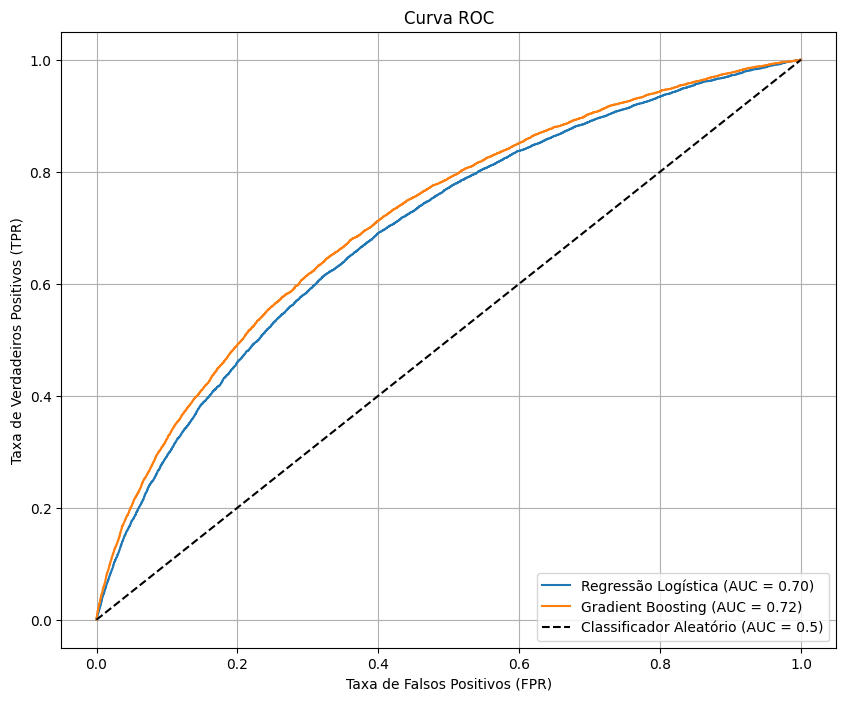

In [129]:
plot_roc_curve(models, X_test_preprocessed, y_test, model_names)

Baseado nas métricas acima, pode-se dizer que o **Gradient Boosting** performou ligeiramente melhor que a Regressão Logística devido a uma pequena vantagem em métricas como precisão e acurácia. O modelo conseguiu prever corretamente mais exemplos da classe 1 (7 vs 5) e teve uma precisão um pouco maior (0.8969 vs 0.8823), indicando que, quando prevê a classe 1, há uma chance maior de estar correto. Além disso, sua matriz de confusão mostra menos erros na classe 0 (4 vs 6). Dessa forma, o modelo "final" escolhido é o *Gradient  Boosting*.

Um ponto importante a ser ressaltado é que houve a tentativa de realizar a *Tunagem* do modelo para identificar os melhores parâmentros e melhorar o desempenho, porém devido ao tamanho do dataframe acima o processo de tunning tanto com Optuna quanto com Grid Search e Random Search demoraram muito, fazendo com que dessa forma ficasse inviável a espera pelo processo. Dado isso, optei por não realizar nesse notebook a tunagem, além disso, tentei ajustar os parâmetros dos modelos, porém quanto mais aumentava os valores pior desempenhava o modelo, desse modo, deixei padrão.

# Novos Dados de Teste

In [138]:
# Para testar o modelo será usado o application test
test_df.shape

(48744, 121)

In [131]:
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [139]:
# Removendo as colunas do application_test
drop_columns_test = [
    'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

drop_columns_test.extend([f'FLAG_DOCUMENT_{i}' for i in range(2, 22)])

test_df = test_df.drop(columns=drop_columns_test)

In [140]:
# Aplicando a função de manipulação do organization_type
test_df['ORGANIZATION_TYPE_GROUPED'] = test_df['ORGANIZATION_TYPE'].apply(agrupar_organization_type)

In [141]:
# Merge dos 3 datasets com o principal application train -> Usar Agregação

# Agregar o bureau_df por SK_ID_CURR
bureau_agg = bureau_df.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['min', 'max', 'mean'],  
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    'AMT_CREDIT_SUM_OVERDUE': ['sum', 'mean'],
    'CREDIT_TYPE': ['nunique']  # Número de categorias de crédito distintos
}).reset_index()

# Renomear as colunas agregadas
bureau_agg.columns = [
    'SK_ID_CURR',
    'BUREAU_DAYS_CREDIT_MIN', 'BUREAU_DAYS_CREDIT_MAX', 'BUREAU_DAYS_CREDIT_MEAN',
    'BUREAU_CREDIT_DAY_OVERDUE_MAX', 'BUREAU_CREDIT_DAY_OVERDUE_MEAN',
    'BUREAU_CNT_CREDIT_PROLONG_SUM',
    'BUREAU_AMT_CREDIT_SUM_SUM', 'BUREAU_AMT_CREDIT_SUM_MEAN',
    'BUREAU_AMT_CREDIT_SUM_DEBT_SUM', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
    'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN',
    'BUREAU_CREDIT_TYPE_NUNIQUE'
]

# Agregar o credit_df por SK_ID_CURR
credit_agg = credit_df.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max'],  
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'max'],
    'AMT_DRAWINGS_CURRENT': ['sum', 'mean'],
    'AMT_INST_MIN_REGULARITY': ['mean'],
    'AMT_PAYMENT_CURRENT': ['sum', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['sum', 'mean'],
    'AMT_RECIVABLE': ['mean'],
    'AMT_TOTAL_RECEIVABLE': ['mean'],
    'CNT_DRAWINGS_CURRENT': ['sum'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}).reset_index()

# Renomear as colunas agregadas
credit_agg.columns = [
    'SK_ID_CURR',
    'CCB_MONTHS_BALANCE_MIN', 'CCB_MONTHS_BALANCE_MAX',
    'CCB_AMT_BALANCE_MEAN', 'CCB_AMT_BALANCE_MAX',
    'CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN', 'CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX',
    'CCB_AMT_DRAWINGS_CURRENT_SUM', 'CCB_AMT_DRAWINGS_CURRENT_MEAN',
    'CCB_AMT_INST_MIN_REGULARITY_MEAN',
    'CCB_AMT_PAYMENT_CURRENT_SUM', 'CCB_AMT_PAYMENT_CURRENT_MEAN',
    'CCB_AMT_PAYMENT_TOTAL_CURRENT_SUM', 'CCB_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
    'CCB_AMT_RECIVABLE_MEAN',
    'CCB_AMT_TOTAL_RECEIVABLE_MEAN',
    'CCB_CNT_DRAWINGS_CURRENT_SUM',
    'CCB_SK_DPD_MAX', 'CCB_SK_DPD_MEAN',
    'CCB_SK_DPD_DEF_MAX', 'CCB_SK_DPD_DEF_MEAN'
]

# Agregar o previous_df por SK_ID_CURR
previous_agg = previous_df.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['sum', 'mean'],  
    'AMT_DOWN_PAYMENT': ['sum', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean'],
    'NAME_PAYMENT_TYPE': ['nunique']  # Número de categorias de pagamento distintos
}).reset_index()

# Renomear as colunas agregadas
previous_agg.columns = [
    'SK_ID_CURR',
    'PREV_AMT_APPLICATION_SUM', 'PREV_AMT_APPLICATION_MEAN',
    'PREV_AMT_DOWN_PAYMENT_SUM', 'PREV_AMT_DOWN_PAYMENT_MEAN',
    'PREV_DAYS_DECISION_MIN', 'PREV_DAYS_DECISION_MAX', 'PREV_DAYS_DECISION_MEAN',
    'PREV_CNT_PAYMENT_MEAN',
    'PREV_NAME_PAYMENT_TYPE_NUNIQUE'
]

# Merge dos datasets agregados com test_df
df_final_new = test_df.merge(bureau_agg, on='SK_ID_CURR', how='left')
df_final_new = df_final_new.merge(credit_agg, on='SK_ID_CURR', how='left')
df_final_new = df_final_new.merge(previous_agg, on='SK_ID_CURR', how='left')

In [144]:
df_final_new.shape

(48744, 73)

In [143]:
# Removendo colunas
df_final_new = df_final_new.drop(columns=['SK_ID_CURR', 'OCCUPATION_TYPE'])

In [145]:
# Realizando o pré processamento
df_final_preprocessed = preprocessor.transform(df_final_new)

In [146]:
y_pred_new = grad_boost.predict(df_final_preprocessed)

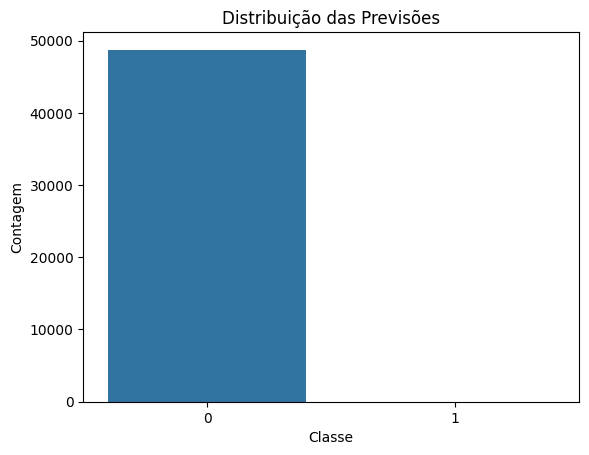

In [149]:
# Contando as previsões
pred_counts = pd.Series(y_pred_new).value_counts()

# Plotando
sns.barplot(x=pred_counts.index, y=pred_counts.values)
plt.title('Distribuição das Previsões')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

In [147]:
# Realizando as previsões
y_new_proba = grad_boost.predict_proba(df_final_preprocessed)
print(y_new_proba)

[[0.88682758 0.11317242]
 [0.83913444 0.16086556]
 [0.95811188 0.04188812]
 ...
 [0.9341969  0.0658031 ]
 [0.9157718  0.0842282 ]
 [0.89947731 0.10052269]]


   Classe 0  Classe 1  Classe Prevista
0  0.886828  0.113172                0
1  0.839134  0.160866                0
2  0.958112  0.041888                0
3  0.948084  0.051916                0
4  0.887413  0.112587                0


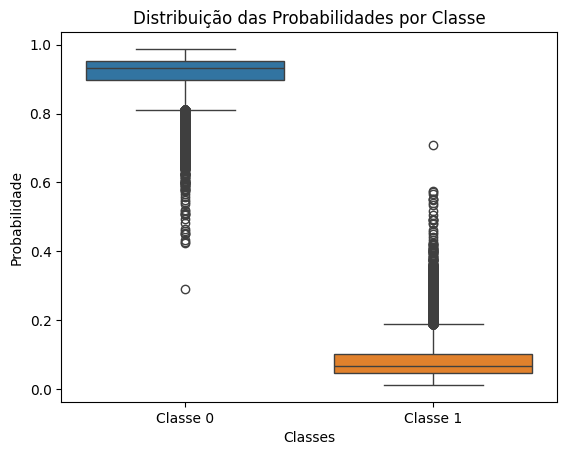

In [150]:
# Criando um DataFrame com as probabilidades
proba_df = pd.DataFrame(y_new_proba, columns=[f'Classe {i}' for i in range(y_new_proba.shape[1])])
proba_df['Classe Prevista'] = y_pred_new

# Exibindo as probabilidades
print(proba_df.head())

# Plotando as probabilidades
sns.boxplot(data=proba_df.drop(columns=['Classe Prevista']))
plt.title('Distribuição das Probabilidades por Classe')
plt.ylabel('Probabilidade')
plt.xlabel('Classes')
plt.show()

Com base nos resultados obtidos e na análise dos gráficos, é evidente que o desbalanceamento da classe target teve um impacto significativo nas previsões do modelo. Mais de 95% das previsões foram classificadas como **Classe 0** (cliente não inadimplente), o que reflete a predominância dessa classe no conjunto de dados.

Além disso, o gráfico de boxplot das probabilidades revela que a maioria das previsões tende fortemente para a Classe 0, com alguns poucos outliers em ambas as classes. Esse comportamento indica que o modelo está enviesado em favor da classe majoritária, resultando em uma tendência de prever predominantemente a Classe 0.

In [148]:
# Criando o arquivo de Submission
sk_id_curr = test_df['SK_ID_CURR']

submission = pd.DataFrame({
    'SK_ID_CURR': sk_id_curr,
    'TARGET': y_new_proba[:, 1]  # Probabilidades da classe positiva
})

submission.to_csv('submission.csv', index=False)